In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings('ignore')
os.listdir()

['.ipynb_checkpoints',
 'data.parquet',
 'test.parquet',
 '제출용_EDA.ipynb',
 '크롤링_역주소.ipynb']

In [3]:
df = pd.read_parquet('data.parquet')
df.head()

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,...,sin_dow,cos_dow,sin_dom,cos_dom,sin_wom,cos_wom,sin_woy,cos_woy,sin_doy,cos_doy
0,2021-01-01 00:00:00,1,150,서울역,0,419,-9.600,291.100,3.300,0.000,...,-0.434,-0.901,0.201,0.980,0.951,0.309,0.121,0.993,0.017,1.000
1,2021-01-01 01:00:00,1,150,서울역,0,419,-9.700,284.600,2.000,0.000,...,-0.434,-0.901,0.201,0.980,0.951,0.309,0.121,0.993,0.017,1.000
2,2021-01-01 05:00:00,1,150,서울역,0,419,-9.300,124.700,2.400,0.000,...,-0.434,-0.901,0.201,0.980,0.951,0.309,0.121,0.993,0.017,1.000
3,2021-01-01 06:00:00,1,150,서울역,0,419,-9.300,126.200,1.700,0.000,...,-0.434,-0.901,0.201,0.980,0.951,0.309,0.121,0.993,0.017,1.000
4,2021-01-01 07:00:00,1,150,서울역,0,419,-9.100,145.700,1.300,0.000,...,-0.434,-0.901,0.201,0.980,0.951,0.309,0.121,0.993,0.017,1.000


In [4]:
df.groupby(['year', 'month', 'day']).value_counts()

year  month  day  TM                   Line  station_number  station_name  Direction  STN  TA      WD       WS     RN_DAY  RN_HR1  HM      ta_chi   Congestion  신설역  신규관측소  transfer  address  hour  weekday  week_of_month  week_of_year  day_of_year  is_holiday  is_day_before_holiday  is_day_after_holiday  is_weekend  time_period  sin_hod  cos_hod  sin_dow  cos_dow  sin_dom  cos_dom  sin_wom  cos_wom  sin_woy  cos_woy  sin_doy  cos_doy
0     0      0    2021-01-01 00:00:00  1     150             서울역           0          419  -9.600  291.100  3.300  0.000   0.000   47.500  -12.600  0.000       0    0      5         중구       0     4        1              53            1            1           1                      0                     0           0            0.000    1.000    -0.434   -0.901   0.201    0.980    0.951    0.309    0.121    0.993    0.017    1.000      1
                                                                           1          419  -9.600  291.100  3.300  0.000 

In [3]:
df.columns

Index(['TM', 'Line', 'station_number', 'station_name', 'Direction', 'STN',
       'TA', 'WD', 'WS', 'RN_DAY', 'RN_HR1', 'HM', 'ta_chi', 'Congestion',
       '신설역', '신규관측소', 'transfer', 'address', 'year', 'month', 'day', 'hour',
       'weekday', 'week_of_month', 'week_of_year', 'day_of_year', 'is_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_weekend',
       'time_period', 'sin_hod', 'cos_hod', 'sin_dow', 'cos_dow', 'sin_dom',
       'cos_dom', 'sin_wom', 'cos_wom', 'sin_woy', 'cos_woy', 'sin_doy',
       'cos_doy'],
      dtype='object')

# 첫 EDA

In [5]:
cond = df['Line']==2
df.loc[cond,'Direction'].unique()

array([3, 2], dtype=int8)

In [8]:
print('내선외선은 2호선에만 존재하며 2호선에는 내선, 외선만 존재')

내선외선은 2호선에만 존재하며 2호선에는 내선, 외선만 존재


In [10]:
en_cols = list(set(df.columns)-set(df.select_dtypes(np.number).columns))

from sklearn.preprocessing import LabelEncoder
for col in en_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [11]:
df.columns

Index(['TM', 'Line', 'station_number', 'station_name', 'Direction', 'STN',
       'TA', 'WD', 'WS', 'RN_DAY', 'RN_HR1', 'HM', 'ta_chi', 'Congestion',
       '신설역', '신규관측소', 'transfer', 'address', 'year', 'month', 'day', 'hour',
       'weekday', 'week_of_month', 'week_of_year', 'day_of_year', 'is_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_weekend',
       'time_period', 'sin_hod', 'cos_hod', 'sin_dow', 'cos_dow', 'sin_dom',
       'cos_dom', 'sin_wom', 'cos_wom', 'sin_woy', 'cos_woy', 'sin_doy',
       'cos_doy'],
      dtype='object')

In [23]:
import seaborn as sns

# 1) 시계열 변수
시계열변수 = [
    'day', 'day_of_year', 'hour', 'month',
    'week_of_month', 'week_of_year', 'weekday', 'year'
]

# 2) 삼각 변수
삼각변수 = [
    'sin_dom', 'cos_dom',
    'sin_dow', 'cos_dow',
    'sin_hod', 'cos_hod',
    'sin_wom', 'cos_wom',
    'sin_woy', 'cos_woy',
    'sin_doy', 'cos_doy'
]

# 3) 휴일·주말 변수
휴일주말변수 = [
    'is_day_before_holiday',
    'is_day_after_holiday',
    'is_holiday',
    'is_weekend'
]

# 4) 시간대 변수
시간대변수 = ['time_period']

# 5) 지하철 변수
지하철변수 = ['transfer', 'address','Direction', 'Line', 'STN', 'station_name', 'station_number', '신설역', '신규관측소']

# 6) 기상변수
기상변수 =  ['HM', 'RN_DAY', 'RN_HR1','TA', 'TM', 'WD','WS','ta_chi']

corr_시계열   = df[시계열변수   + ['Congestion']].corr()
corr_삼각     = df[삼각변수     + ['Congestion']].corr()
corr_휴일주말 = df[휴일주말변수 + ['Congestion']].corr()
corr_시간대   = df[시간대변수   + ['Congestion']].corr()
corr_기상     = df[기상변수     + ['Congestion']].corr()
corr_지하철 = df['address transfer  Congestion'.split()].corr()

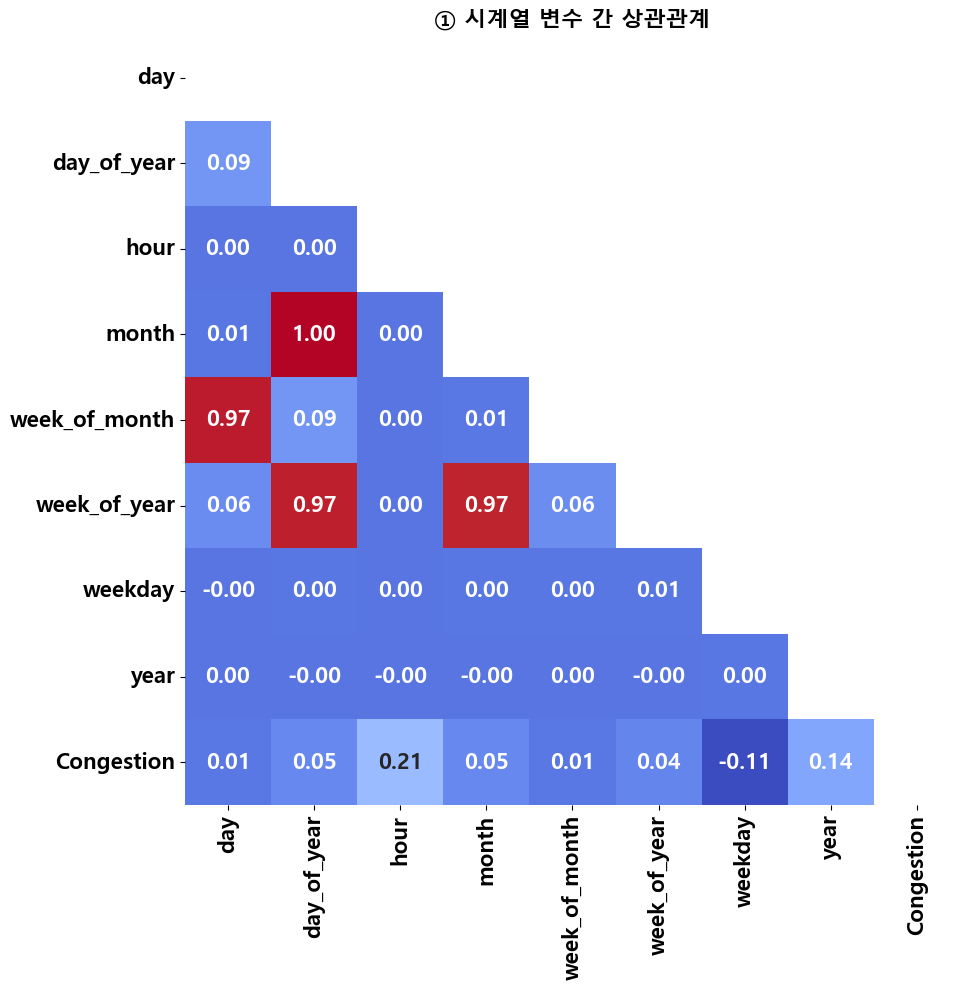

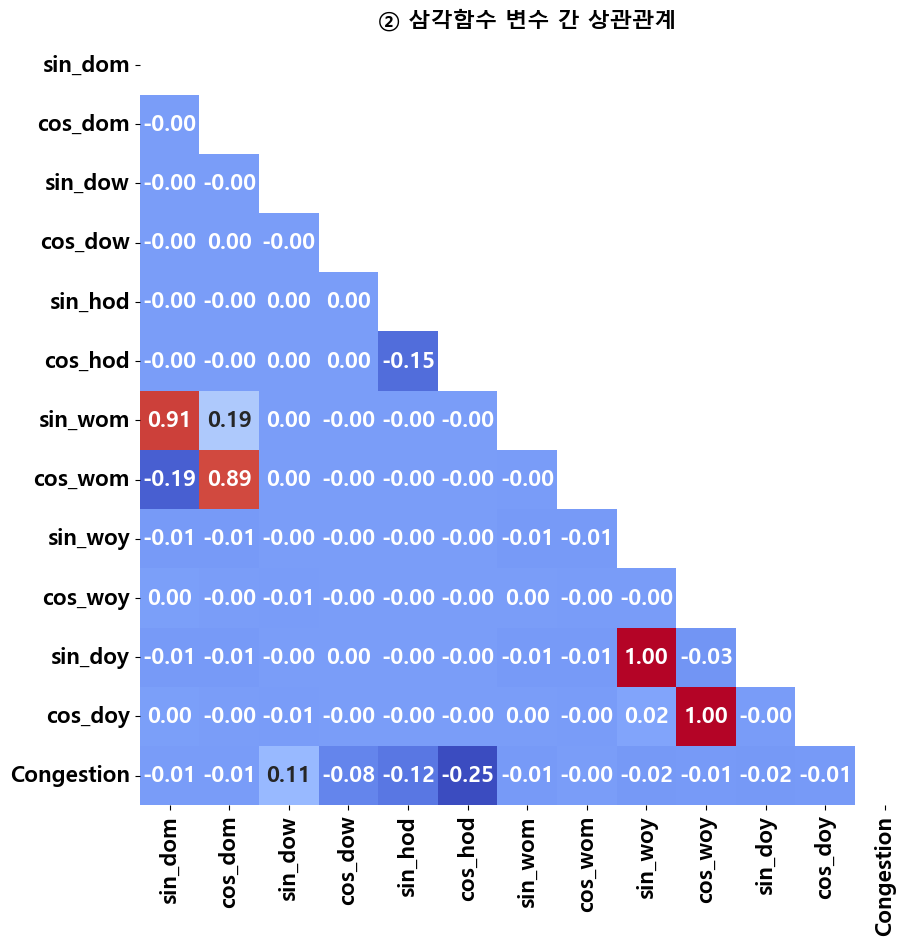

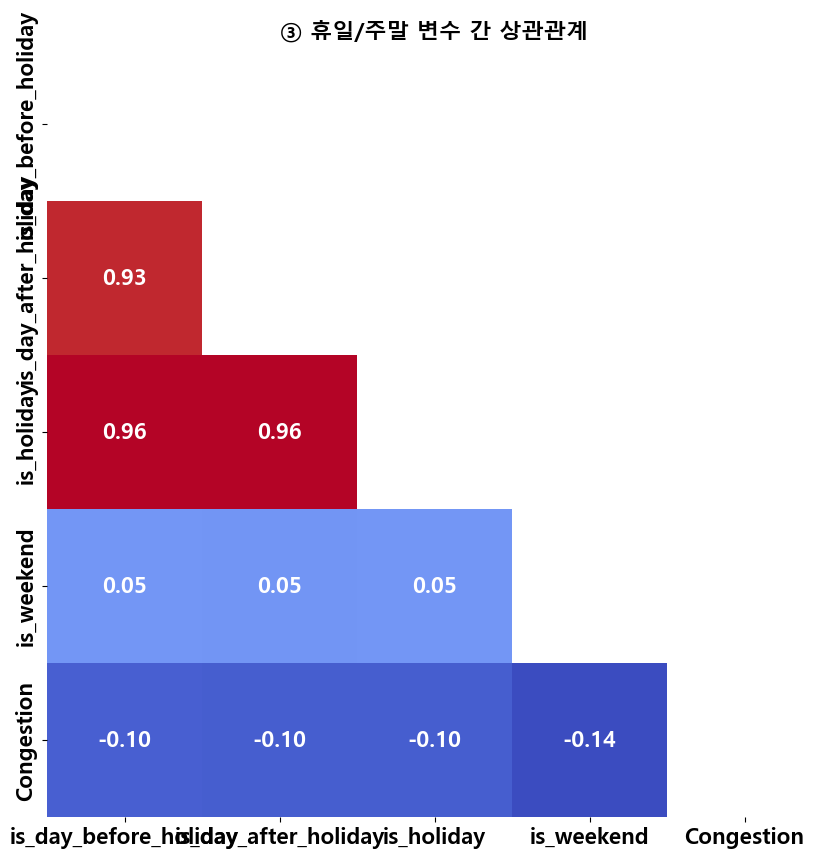

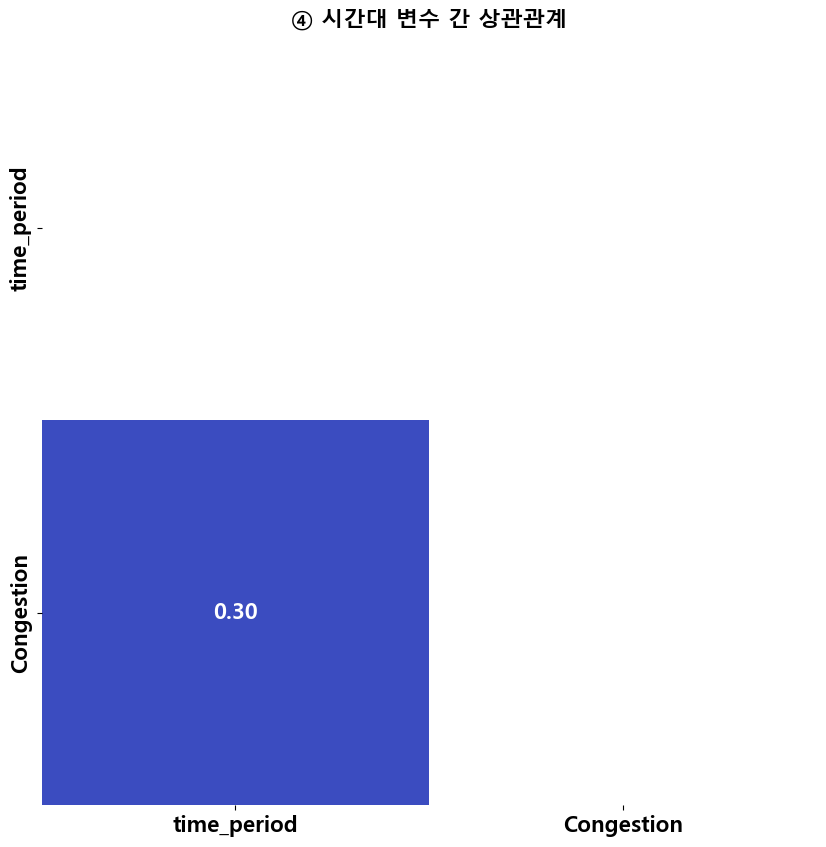

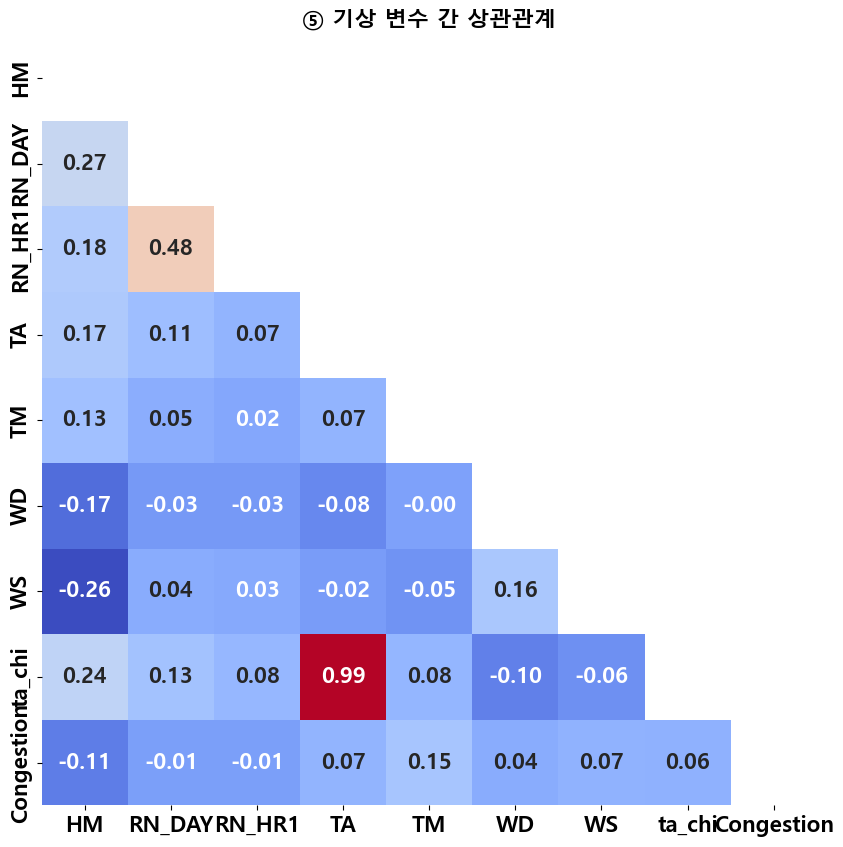

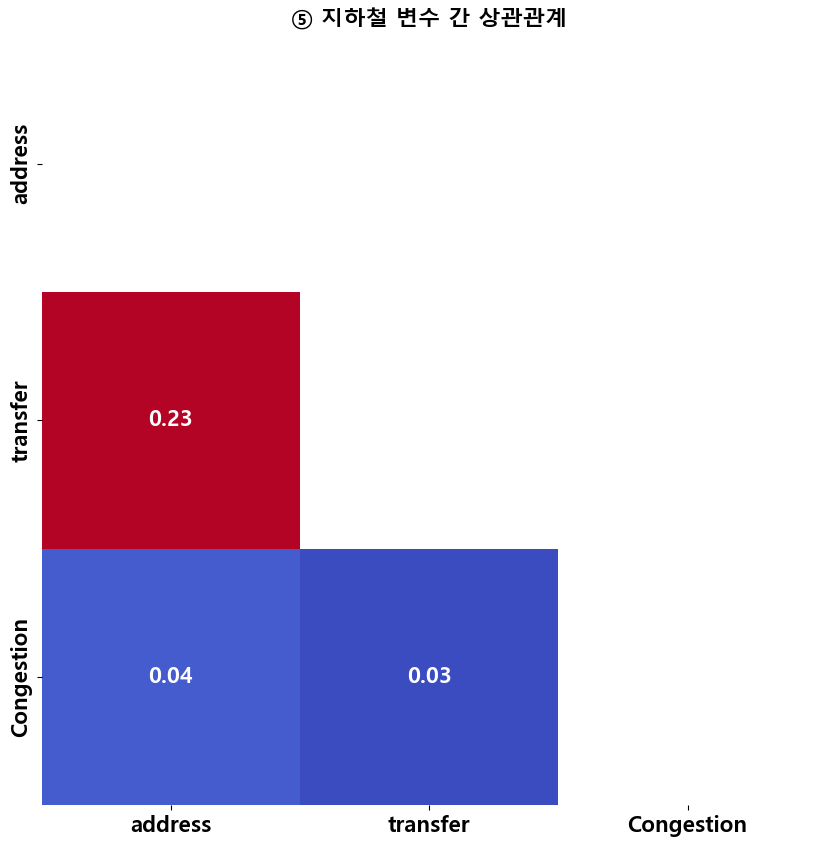

In [25]:
# ① 시계열 변수 간 상관관계
plot_corr_heatmap(corr_시계열, "① 시계열 변수 간 상관관계", fontsize=16)

# ② 삼각함수 변수 간 상관관계
plot_corr_heatmap(corr_삼각, "② 삼각함수 변수 간 상관관계", fontsize=16)

# ③ 휴일/주말 변수 간 상관관계
plot_corr_heatmap(corr_휴일주말, "③ 휴일/주말 변수 간 상관관계", fontsize=16)

# ④ 시간대 변수 간 상관관계
plot_corr_heatmap(corr_시간대, "④ 시간대 변수 간 상관관계", fontsize=16)

# ⑤ 기상 변수 간 상관관계
plot_corr_heatmap(corr_기상, "⑤ 기상 변수 간 상관관계", fontsize=16)

# ⑤ 지하철 변수 간 상관관계
plot_corr_heatmap(corr_지하철, "⑤ 지하철 변수 간 상관관계", fontsize=16)

- 시계열 변수 -> hour 0.21, year 0.14, weekday -0.11이 가장 큰 상관성
- 삼각함수 변수 -> cos_hod -0.25, sin_hod -0.12, sin_dow 0.11,  , cos_dow -0.08 순
- 휴일/주말 변수 ->  is_weekend -0.14, is_holiday -0.1, is_day_before_holiday -0.1, is_day_after_holiday -0.1 -> 전반적으로 큰 상관성
- 시간대 변수 -> time_period 0.3


- 호선과 혼잡도는 상관계수가 0...? -> 호선에 따라 혼잡도가 생각보다 크지 않을 수도, 역번호는 차이를 보임- 요일, 휴일여부 상대적으로 혼잡도와 꽤 상관성 큼
[월]
- 기온, 상대습도, 체감온도, 미세먼지 눈에 띄는 상관성
[시간]
- 상대습도, 일사량, 체감온도, ,풍향, 풍속, 기온 차이
- 시간_cos은 일사량과 매우 상관성 커짐.
- 시간은 그냥 시간보다 sin, cos한 게 다른 컬럼들과 상관성이 전반적으로 높아서 그냥 시간보다는 sin, cos을 쓰면 될 듯
[호선]
- 승차총승객수, 하차총승객수, 상하구분, 역번호 차이
- 역번호가 전반적으로 호선보다 더 강한 상관계수를 보였는데, 표현상 어느 게 편한지, 역번호만으로도 광고에 활용할 수 있는지 확인 필요
[상하구분] - 좀 쓸모없어보임 역번호, 호선, 하차, 승차총승객수, 혼잡도(-0.05) 이랑만 상관성 보임
[기온]
- 미세먼지, 체감온도, 일사량, 상대습도, 일강수량, 풍향, 시간, 월과 연관
[풍향&풍속]
- 상대습도와 큰 연관, 서로 연관있음. 시간_sin과 연관
[일강수량]
시간강수량이랑 비슷한데 더 강한 상관성
- 미세먼지, 체감온도, 일사량, 상대습도, 시간강수량, 기온
[상대습도]


## 📊 변수 간 상관관계 요약

### 🎯 타겟: `혼잡도`와 주요 변수 간 상관관계

| 변수명          | 상관계수      | 해석                               |
| ------------ | --------- | -------------------------------- |
| `체감온도`       | **0.21**  | 기온이 높거나 체감온도가 높을수록 혼잡도 약간 증가 경향  |
| `승차총승객수`     | **0.23**  | 승차 인원이 많을수록 혼잡도 증가               |
| `하차총승객수`     | **0.22**  | 하차 인원이 많을수록 혼잡도 증가               |
| `미세먼지`       | **-0.24** | 미세먼지가 심할수록 혼잡도 다소 감소 (실내 이동 선호?) |
| `미세먼지_level` | **-0.27** | 구간화된 미세먼지 수준이 높을수록 혼잡도 낮아짐       |
| `상대습도`       | **-0.13** | 습도가 높을수록 혼잡도는 다소 감소              |

---

### 🔍 상관계수가 높은 변수쌍

| 변수쌍                   | 상관계수      | 해석                                         |
| --------------------- | --------- | ------------------------------------------ |
| `기온` ↔ `체감온도`         | **0.99**  | 거의 완전한 양의 상관 (중복 가능성)                      |
| `일강수량` ↔ `시간강수량`      | **1.00**  | 중복된 데이터, 하나 제거 가능                          |
| `역번호` ↔ `호선`          | **0.72**  | 호선과 역번호 간 강한 상관 (지역적 특성 반영)                |
| `미세먼지` ↔ `미세먼지_level` | **-0.72** | 원본과 구간화된 변수는 음의 상관 (구간 레벨이 클수록 수치는 작게 표시됨) |

---

### ⚠️ 다중공선성 의심 변수 (상관계수 0.8 이상)

* `기온`과 `체감온도` (0.99)
* `일강수량`과 `시간강수량` (1.00)

  * → 두 변수 중 하나 제거 권장
* `미세먼지`와 `미세먼지_level` (–0.72로 상관 강함)

  * → 모델링 목적에 따라 둘 중 하나 선택

---

### 💡 시사점

* `기상 데이터(기온, 체감온도, 미세먼지)`와 `혼잡도` 사이에 일정한 상관관계 존재
* `승차/하차 인원`은 타겟 변수와 의미 있는 양의 상관관계를 보이며 주요 예측 변수로 사용 가능
* `역번호`, `호선` 등은 위치 정보를 반영하며 중복 또는 대표 변수 선택 필요

# 통계적 가설 검정

In [6]:
df.columns

Index(['연월일', '년', '월', '시간', '시간_sin', '시간_cos', '호선', '역번호', '역명', '상하구분',
       'AWS지점코드', '기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도',
       '혼잡도', '승차총승객수', '하차총승객수', '미세먼지', '미세먼지_level', '요일', '휴일여부'],
      dtype='object')

In [16]:
cont_col = ['시간_sin', '시간_cos', 
      '기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도',
       '승차총승객수', '하차총승객수', '미세먼지']

cat_col = ['년', '월', '시간','호선', '미세먼지_level', '요일', '휴일여부']
df[cat_col] = df[cat_col].astype('category')

# 혼잡도 <-> 범주형변수

In [33]:
# 분산분석
분산분석 = ['년', '월', '시간', '호선', '미세먼지_level', '요일']

In [26]:
col = '년'
li =  df[col].unique()
len(li)

3

In [31]:
from scipy.stats import f_oneway

g1 = df[df[col] == li[0]][col]
g2 = df[df[col] == li[1]][col]

print(col)
print(f_oneway(g1, g2))
print('-'*30)

년
F_onewayResult(statistic=inf, pvalue=0.0)
------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
col = 분산분석[1]
li =  df[col].unique()
len(li)

12

In [35]:
from scipy.stats import f_oneway

g0 = df[df[col] == li[0]][col]
g1 = df[df[col] == li[1]][col]
g2 = df[df[col] == li[2]][col]
g3 = df[df[col] == li[3]][col]
g4 = df[df[col] == li[4]][col]
g5 = df[df[col] == li[5]][col]
g6 = df[df[col] == li[6]][col]
g7 = df[df[col] == li[7]][col]
g8 = df[df[col] == li[8]][col]
g9 = df[df[col] == li[9]][col]
g10 = df[df[col] == li[10]][col]
g11 = df[df[col] == li[11]][col]

print(col)
print(f_oneway(g0, g1,g2, g3,g4, g5,g6, g7,g8, g9,g10, g11))
print('-'*30)

월
F_onewayResult(statistic=inf, pvalue=0.0)
------------------------------


In [36]:
col = 분산분석[2]
li =  df[col].unique()
len(li)

21

In [37]:
from scipy.stats import f_oneway

# col: 그룹화할 컬럼명, li: 그룹 값 리스트
# 처음 21개만 사용한다고 가정
for i in range(21):
    globals()[f'g{i}'] = df[df[col] == li[i]][col]

# f_oneway 호출
f_stat, p_val = f_oneway(*(globals()[f'g{i}'] for i in range(21)))
print("F-statistic:", f_stat)
print("p-value:   ", p_val)

F-statistic: inf
p-value:    0.0


In [38]:
col = 분산분석[3]
li =  df[col].unique()
len(li)

8

In [39]:
from scipy.stats import f_oneway

# col: 그룹화할 컬럼명, li: 그룹 값 리스트
# 처음 21개만 사용한다고 가정
for i in range(8):
    globals()[f'g{i}'] = df[df[col] == li[i]][col]

# f_oneway 호출
f_stat, p_val = f_oneway(*(globals()[f'g{i}'] for i in range(21)))
print("F-statistic:", f_stat)
print("p-value:   ", p_val)

F-statistic: inf
p-value:    0.0


In [40]:
col = 분산분석[4]
li =  df[col].unique()
len(li)

4

In [ ]:
from scipy.stats import f_oneway

# col: 그룹화할 컬럼명, li: 그룹 값 리스트
# 처음 21개만 사용한다고 가정
for i in range(4):
    globals()[f'g{i}'] = df[df[col] == li[i]][col]

# f_oneway 호출
f_stat, p_val = f_oneway(*(globals()[f'g{i}'] for i in range(21)))
print("F-statistic:", f_stat)
print("p-value:   ", p_val)

In [40]:
col = 분산분석[5]
li =  df[col].unique()
len(li)

4

In [ ]:
from scipy.stats import f_oneway

g1 = df[df[col] == li[0]][col]
g2 = df[df[col] == li[1]][col]
g3 = df[df[col] == li[2]][col]
g4 = df[df[col] == li[3]][col]

print(col)
print(f_oneway(g1, g2,g3, g4))
print('-'*30)

In [ ]:
# T-test

In [22]:
import scipy.stats as stats

df_취소 = df[df['휴일여부'] == 1]
df_안취소 = df[df['휴일여부'] == 0]

group1 = df_취소.혼잡도
group2 = df_안취소.혼잡도

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group1, group2)

# 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

# p-value가 0.05보다 작은지 확인하여 유의성 판단
if p_value < 0.05:
    print("두 그룹의 평균에 유의미한 차이가 있습니다.")
else:
    print("두 그룹의 평균에 유의미한 차이가 없습니다.")

t-statistic: -688.1723565586348
p-value: 0.0
두 그룹의 평균에 유의미한 차이가 있습니다.


# 혼잡도 <-> 연속형변수 : 회귀분석

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    # 초기 모델 적합
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    print("초기 모델 p-values:\n", p_values)

    # p-value가 높은 변수부터 제거
    while p_values.max() > significance_level:
        # 가장 큰 p-value를 가진 변수명 찾기
        max_p_col = p_values.idxmax()
        print(f"제거 대상 변수: {max_p_col} (p={p_values[max_p_col]:.4f})")
        # 해당 변수 제거
        X = X.drop(columns=[max_p_col])
        # 모델 재적합
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        print(f"변수 제거 후 p-values:\n{p_values}\n")

    # 최종 모델 반환
    return model

def print_regression_equation(model):
    params = model.params
    intercept = params.iloc[0]
    coefs = params.iloc[1:]
    eq = f"Y = {intercept:.4f}"
    for name, coef in coefs.items():
        eq += f" + ({coef:.4f})*{name}"
    print("\n최종 회귀식:")
    print(eq)

In [19]:
# 독립 변수(X)와 종속 변수(y) 분리
X = df[cont_col]  # 독립 변수들
y = df['혼잡도']  # 종속 변수
# 상수항 추가 (절편 추가)
X = sm.add_constant(X)

# 후진제거법 실행
final_model = backward_elimination(X, y)

# 최종 모델의 회귀식 출력
print_regression_equation(final_model)

# 최종 모델의 결과 출력
print("\n최종 모델 결과:\n", final_model.summary())

초기 모델 p-values:
 const    0.000
시간_sin   0.000
시간_cos   0.000
기온       0.000
풍향       0.000
풍속       0.000
일강수량     0.000
시간강수량    0.000
상대습도     0.000
일사량      0.000
체감온도     0.000
승차총승객수   0.000
하차총승객수   0.000
미세먼지     0.000
dtype: float64

최종 회귀식:
Y = 23.1113 + (-4.9350)*시간_sin + (-12.2899)*시간_cos + (0.3234)*기온 + (0.0014)*풍향 + (-0.3239)*풍속 + (0.0024)*일강수량 + (-0.2115)*시간강수량 + (-0.0998)*상대습도 + (-6.2531)*일사량 + (-0.1322)*체감온도 + (0.0000)*승차총승객수 + (0.0003)*하차총승객수 + (0.0135)*미세먼지

최종 모델 결과:
                             OLS Regression Results                            
Dep. Variable:                    혼잡도   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                 2.529e+05
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        14:26:45   Log-Likelihood:            -6.7116e+07
No. Observations:            1565

# 기본 EDA

In [4]:
eda_df = pd.read_csv('./data/data2.csv')

eda_df = eda_df[eda_df['년']==2023]
eda_df.head()

,날짜,연월일,년,월,시간,시간_sin,시간_cos,호선,역번호,역명,...,상대습도,일사량,체감온도,혼잡도,승차총승객수,하차총승객수,미세먼지,미세먼지_level,요일,휴일여부
10414950,2023-01-01 00:00:00,2023-01-01,2023,1,0,0.000,1.000,5,2511,방화,...,75.000,0.010,0.400,0.000,3631.000,3541.000,52.000,보통,6,1
10414951,2023-01-01 00:00:00,2023-01-01,2023,1,0,0.000,1.000,5,2566,하남검단산,...,75.900,0.010,-2.500,0.000,4193.000,4079.000,52.000,보통,6,1
10414952,2023-01-01 00:00:00,2023-01-01,2023,1,0,0.000,1.000,1,1015,회기,...,61.600,0.010,0.500,6.000,12284.000,13244.000,52.000,보통,6,1
10414953,2023-01-01 00:00:00,2023-01-01,2023,1,0,0.000,1.000,5,2565,하남시청,...,75.900,0.010,-2.500,0.000,3679.000,3701.000,52.000,보통,6,1
10414954,2023-01-01 00:00:00,2023-01-01,2023,1,0,0.000,1.000,6,2611,응암,...,67.900,0.010,0.900,0.000,8198.000,8656.000,52.000,보통,6,1


In [3]:
unique_cols = ['년', '월', '시간',  '호선', '역번호', '역명', '상하구분',
       'AWS지점코드','미세먼지', '미세먼지_level', '요일', '휴일여부']
for col in unique_cols:
    print(col)
    print(sorted(eda_df[col].unique()))
    print('-'*30)

년
[2023]
------------------------------
월
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
------------------------------
시간
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
------------------------------
호선
[1, 2, 3, 4, 5, 6, 7, 8]
------------------------------
역번호
[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 1002, 1003, 1004, 1005, 1006, 1007, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1032, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1701, 1

In [5]:
pd.set_option('display.max_columns', None)
eda_df.describe(include='all')

,날짜,연월일,년,월,시간,시간_sin,시간_cos,호선,역번호,역명,상하구분,AWS지점코드,기온,풍향,풍속,일강수량,시간강수량,상대습도,일사량,체감온도,혼잡도,승차총승객수,하차총승객수,미세먼지,미세먼지_level,요일,휴일여부
count,5238660,5238660,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660,5238660,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660.000,5238660,5238660.000,5238660.000
unique,7644,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,2023-12-30 07:00:00,2023-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,종로3가,하선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,좋음,NaN,NaN
freq,692,14532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45864,2298282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2534532,NaN,NaN
mean,NaN,NaN,2023.000,6.541,12.714,-0.099,-0.099,4.028,1640.494,NaN,NaN,429.003,14.184,184.508,1.639,2.433,0.172,64.502,0.690,14.506,25.517,19496.343,19507.214,37.674,NaN,3.017,0.319
std,NaN,NaN,0.000,3.448,6.548,0.700,0.700,2.186,1034.974,NaN,NaN,143.662,10.978,103.044,1.221,9.280,1.246,21.738,0.923,11.958,21.179,17297.184,17656.866,26.371,NaN,2.000,0.466
min,NaN,NaN,2023.000,1.000,0.000,-1.000,-1.000,1.000,150.000,NaN,NaN,98.000,-21.000,-9.900,0.000,0.000,0.000,4.400,0.000,-25.200,0.000,1.000,0.000,5.000,NaN,0.000,0.000
25%,NaN,NaN,2023.000,4.000,8.000,-0.707,-0.707,2.000,342.000,NaN,NaN,407.000,5.200,94.600,0.800,0.000,0.000,48.300,0.022,4.600,10.000,7908.000,7727.000,21.000,NaN,1.000,0.000
50%,NaN,NaN,2023.000,7.000,13.000,-0.259,-0.259,4.000,1903.000,NaN,NaN,415.000,15.800,198.000,1.400,0.000,0.000,65.000,0.150,15.800,22.000,14297.000,13877.000,32.000,NaN,3.000,0.000
75%,NaN,NaN,2023.000,10.000,18.000,0.500,0.500,6.000,2623.000,NaN,NaN,435.000,23.400,273.400,2.300,0.000,0.000,82.400,1.210,25.100,35.000,24888.000,25066.000,46.000,NaN,5.000,1.000


In [75]:
# 1) 수치형 컬럼 선택
num_cols = eda_df.select_dtypes(include='number').columns
# 2) 통계량 집계: min, max, std, skew
stats = eda_df[num_cols].agg(['min', 'max', 'std', 'skew']).T
# 3) skew(왜도) 기준으로 오름차순 정렬
stats_sorted = stats.sort_values(by='skew')
# 4) 출력
stats_sorted

,min,max,std,skew
체감온도,-25.200,37.000,11.958,-0.363
기온,-21.000,38.200,10.978,-0.346
역번호,150.000,3760.000,1034.974,-0.313
시간,0.000,23.000,6.548,-0.242
풍향,-9.900,360.000,103.044,-0.228
상대습도,4.400,100.000,21.738,-0.204
월,1.000,12.000,3.448,-0.018
요일,0.000,6.000,2.000,-0.006
년,2023.000,2023.000,0.000,0.000
호선,1.000,8.000,2.186,0.124


In [6]:
cat_col = '년 월 시간 호선 역번호 역명 상하구분 AWS지점코드 요일 휴일여부 미세먼지_level'.split()
cont_col = '미세먼지 시간 시간_sin 시간_cos 기온	풍향	풍속	일강수량	시간강수량	상대습도	일사량	체감온도	혼잡도	승차총승객수	하차총승객수	미세먼지'.split()

## 이상치

### 풍향이 음수 -> 이상치 O

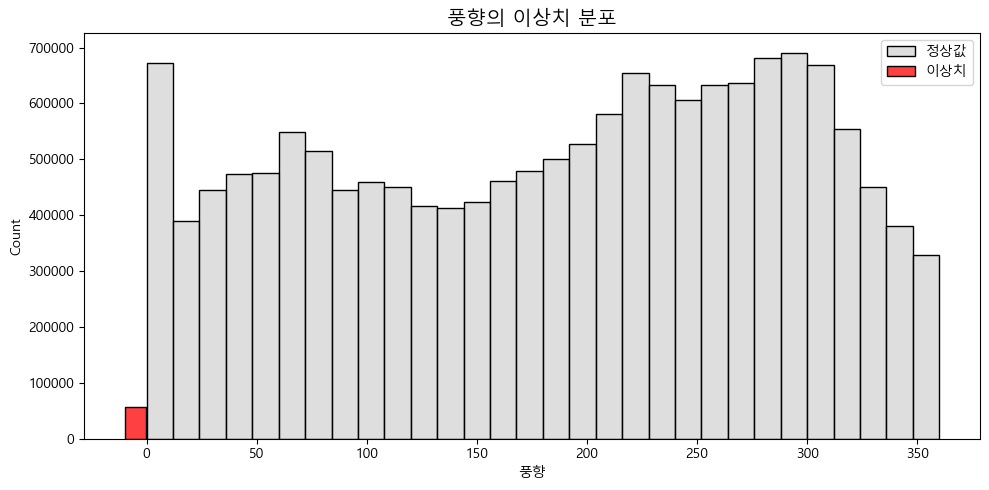

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 풍향 분리
df_valid = eda_df[eda_df['풍향'] >= 0]
df_outlier = eda_df[eda_df['풍향'] < 0]

# 히스토그램
plt.figure(figsize=(10, 5))
sns.histplot(df_valid['풍향'], bins=30, color='lightgrey', label='정상값')
sns.histplot(df_outlier['풍향'], bins=1, color='red', label='이상치')

plt.title('풍향의 이상치 분포', fontsize=14)
plt.xlabel('풍향')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
cond = eda_df['풍향'] < 0
print('풍향의 이상치 비율 : ', eda_df[cond].shape[0]/eda_df.shape[0]*100, '%')

풍향의 이상치 비율 :  0.3614629468857343 %


### 하차총승객수가 0 -> 이상치 ?

In [18]:
print('하차총승객수의 이상치 비율 : ', eda_df[cond2].shape[0]/eda_df.shape[0]*100, '%')

하차총승객수의 이상치 비율 :  0.10329885566332621 %


In [21]:
tab = eda_df[eda_df['하차총승객수']<=0]
tab

,날짜,연월일,년,월,시간,시간_sin,시간_cos,호선,역번호,역명,...,상대습도,일사량,체감온도,혼잡도,승차총승객수,하차총승객수,미세먼지,미세먼지_level,요일,휴일여부
5355768,2022-01-01 00:00:00,2022-01-01,2022,1,0,0.000,1.000,7,3761,부평구청,...,36.000,0.004,-7.500,1.000,1.000,0.000,28.000,좋음,5,1
5355774,2022-01-01 00:00:00,2022-01-01,2022,1,0,0.000,1.000,7,3756,신중동,...,36.000,0.004,-7.500,0.000,3.000,0.000,28.000,좋음,5,1
5355778,2022-01-01 00:00:00,2022-01-01,2022,1,0,0.000,1.000,7,3756,신중동,...,36.000,0.004,-7.500,0.000,3.000,0.000,28.000,좋음,5,1
5355783,2022-01-01 00:00:00,2022-01-01,2022,1,0,0.000,1.000,7,3761,부평구청,...,36.000,0.004,-7.500,0.000,1.000,0.000,28.000,좋음,5,1
5355796,2022-01-01 00:00:00,2022-01-01,2022,1,0,0.000,1.000,7,3760,굴포천,...,36.000,0.004,-7.500,2.000,2.000,0.000,28.000,좋음,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15637685,2023-12-30 21:00:00,2023-12-30,2023,12,21,-0.707,0.707,7,3756,신중동,...,94.600,0.003,0.300,25.000,1.000,0.000,39.000,보통,5,1
15638226,2023-12-30 22:00:00,2023-12-30,2023,12,22,-0.500,0.866,7,3756,신중동,...,96.200,0.004,1.900,38.000,1.000,0.000,39.000,보통,5,1
15638331,2023-12-30 22:00:00,2023-12-30,2023,12,22,-0.500,0.866,7,3756,신중동,...,96.200,0.004,1.900,21.000,1.000,0.000,39.000,보통,5,1
15638843,2023-12-30 23:00:00,2023-12-30,2023,12,23,-0.259,0.966,7,3756,신중동,...,96.100,0.005,2.100,40.000,1.000,0.000,39.000,보통,5,1


In [22]:
np.unique(tab['역명'], return_counts=True)

(array(['굴포천', '까치울', '부천시청', '부천종합운동장', '부평구청', '삼산체육관', '상동', '신중동',
        '춘의'], dtype=object),
 array([1848, 2898, 2226,  504, 1386,  966, 2604, 2310, 1428], dtype=int64))

In [35]:
역 = ['굴포천', '까치울', '부천시청', '부천종합운동장', '부평구청', '삼산체육관', '상동', '신중동',
        '춘의']
np.unique(tab.loc[eda_df['역명'].isin(역),'호선'])

array([7], dtype=int64)

In [26]:
cont_col

['년',
 '월',
 '시간',
 '호선',
 '역번호',
 '역명',
 '상하구분',
 'AWS지점코드',
 '요일',
 '휴일여부',
 '미세먼지_level']

In [36]:
역 = ['굴포천', '까치울', '부천시청', '부천종합운동장', '부평구청', '삼산체육관', '상동', '신중동',
        '춘의']
np.unique(tab.loc[tab['역명'].isin(역),'시간'], return_counts=True)

(array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23], dtype=int64),
 array([770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770,
        770, 770, 770, 770, 770, 770, 770, 770], dtype=int64))

In [38]:
np.unique(tab.loc[tab['호선']==7,'시간'], return_counts=True)

(array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23], dtype=int64),
 array([770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770, 770,
        770, 770, 770, 770, 770, 770, 770, 770], dtype=int64))

In [40]:
역 = ['굴포천', '까치울', '부천시청', '부천종합운동장', '부평구청', '삼산체육관', '상동', '신중동',
        '춘의']
np.unique(tab.loc[tab['역명'].isin(역),'월'], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),
 array([3906, 4746, 2478, 1302,  924,  504,  462,  756,  420,  294,  252,
         126], dtype=int64))

# 분포 확인

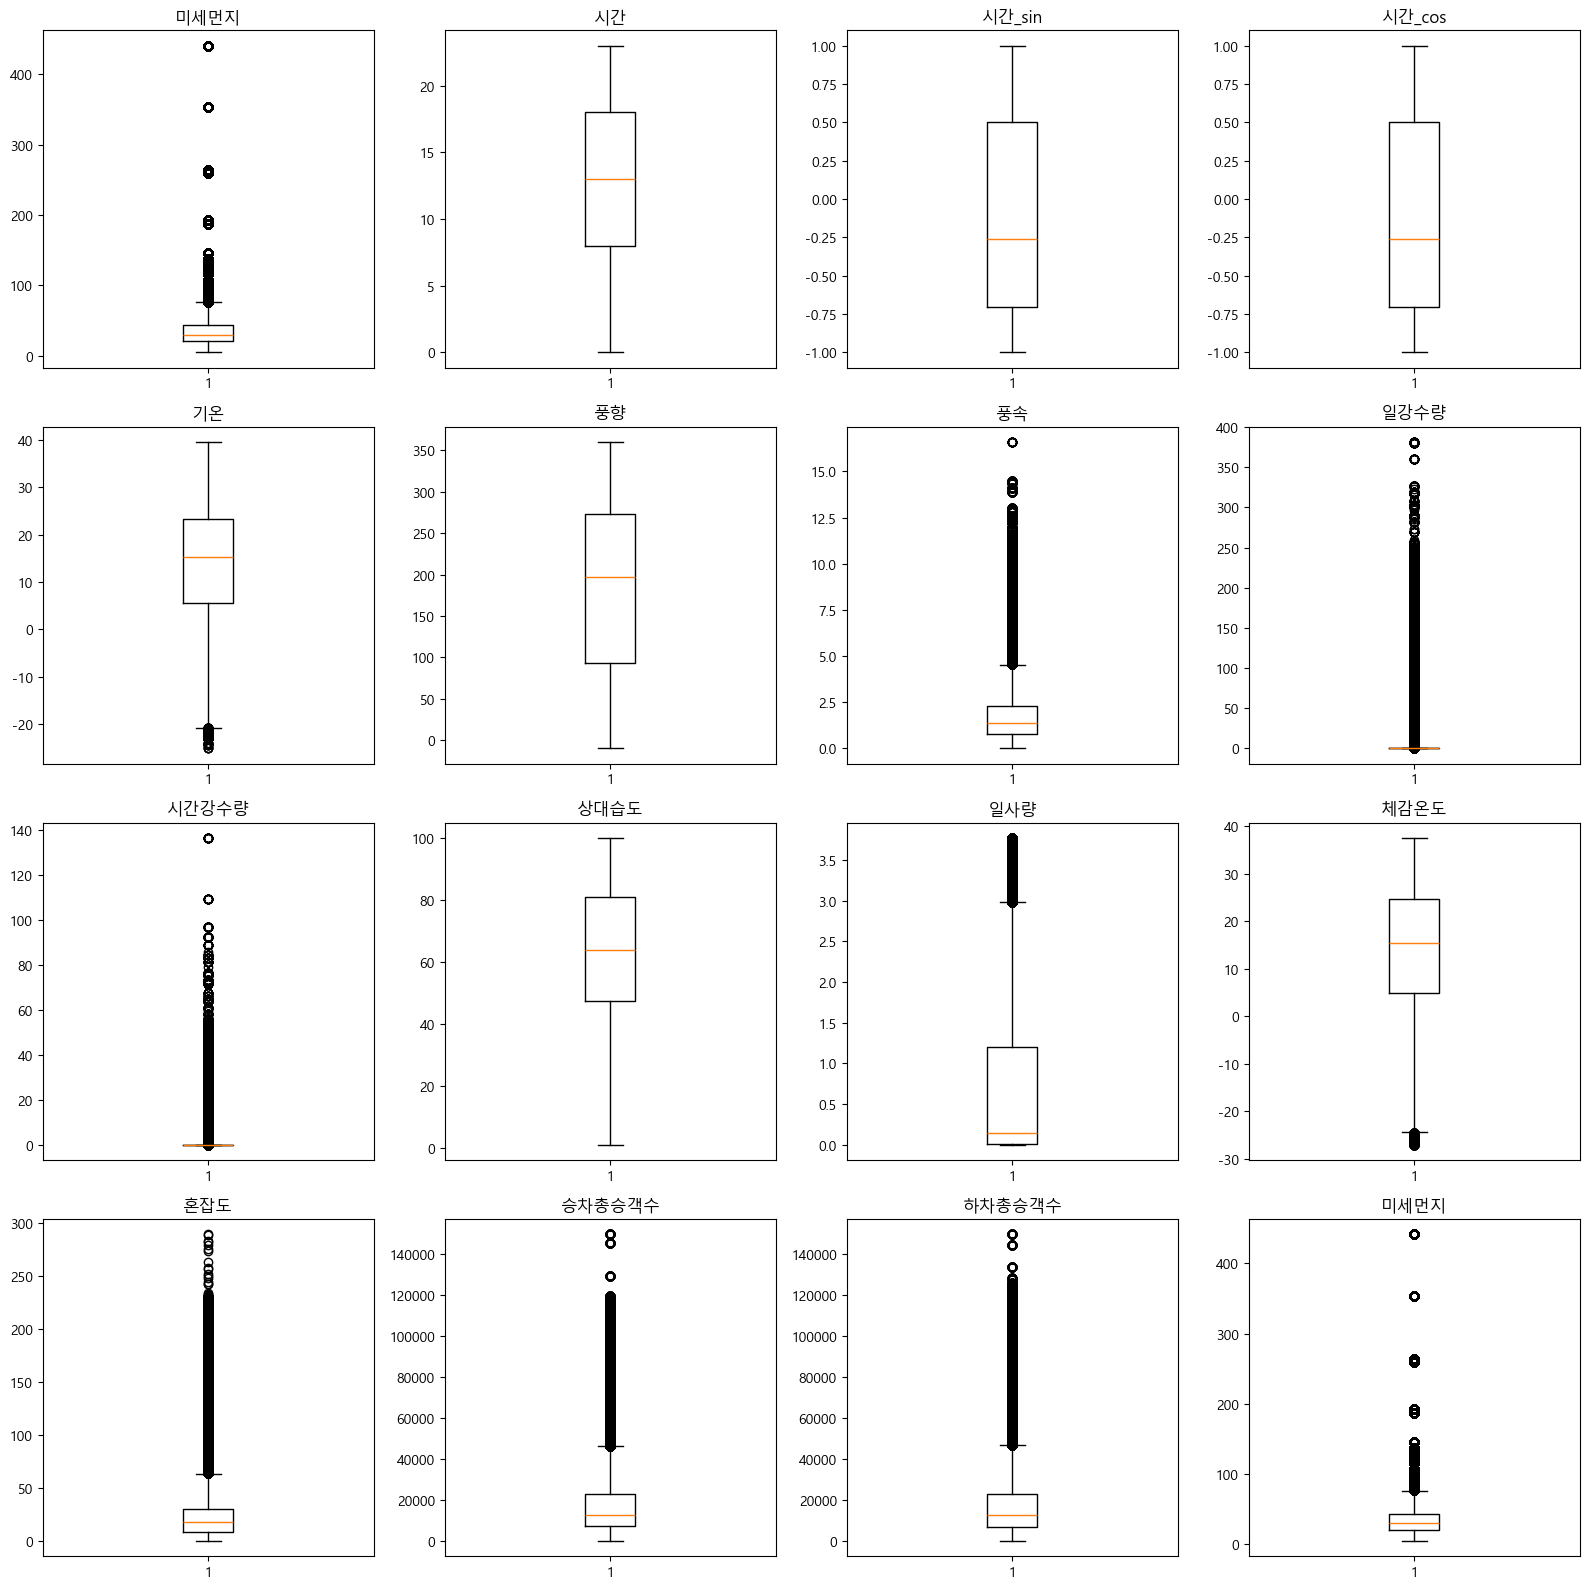

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(16, 16))  # 4x4 subplot 생성
for i, col in enumerate(cont_col):
    row, col_idx = divmod(i, 4)  # 2차원 인덱싱
    ax[row, col_idx].boxplot(eda_df[col].dropna())
    ax[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

# EDA : 기상 <-> 지하철 혼잡도 
- 미세먼지, 기온, 풍향, 풍속, 일강수량, 시간강수량, 상대습도, 일사량, 체감온도

In [3]:
기상_cols = '미세먼지 기온 풍향 풍속 일강수량 시간강수량 상대습도 일사량 혼잡도'.split()
# 체감온도&기온은 상관관계 0.99로 기온을 사용함

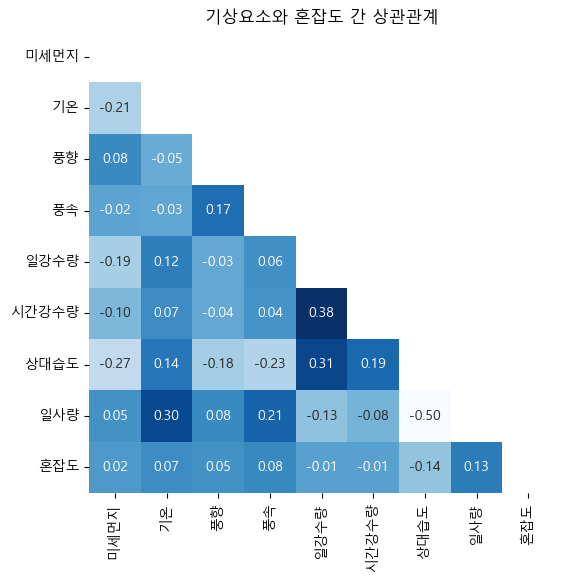

In [80]:
corr_tab = eda_df[기상_cols].corr()
mask = np.triu(np.ones_like(corr_tab, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(corr_tab, mask=mask, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title("기상요소와 혼잡도 간 상관관계")
plt.show()

- 습도(-) > 일사량(+) > 기온(+) > 풍속(+) > 풍향(+) > 미세먼지(+) > 일강수량(-), 시간강수량(-)

In [ ]:
# import seaborn as sns
# for col in 기상_cols:
#     plt.figure(figsize=(6, 4))
#     sns.kdeplot(data=eda_df, x=col, y='혼잡도', fill=True, cmap='Blues')
#     plt.title(f"{col} vs 혼잡도 (밀도 기반)")
#     plt.tight_layout()
#     plt.show()

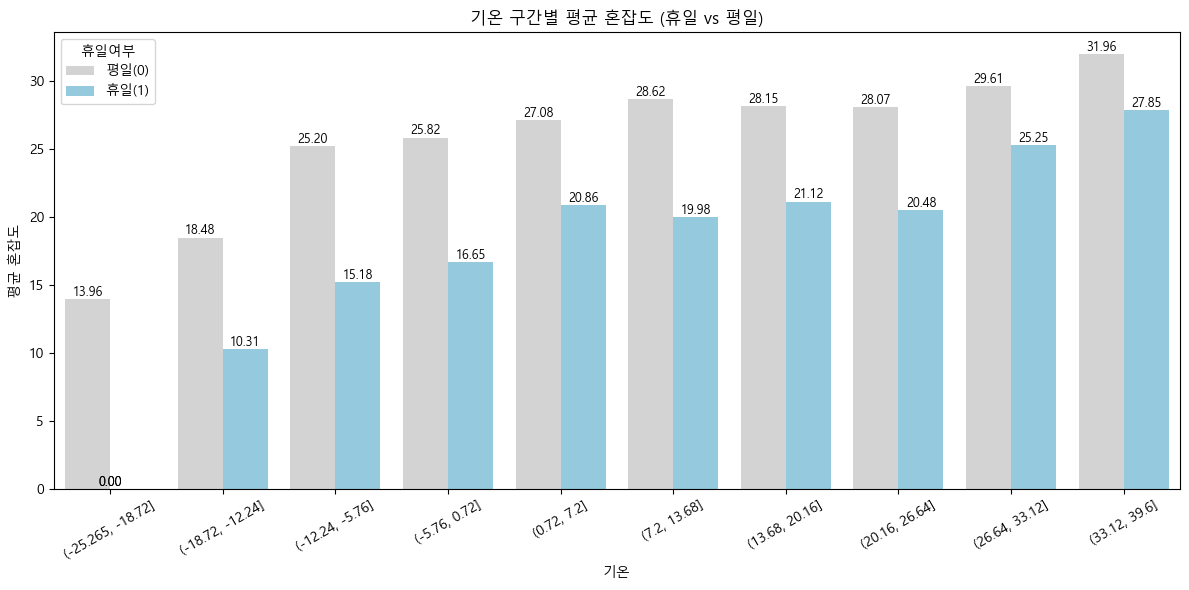

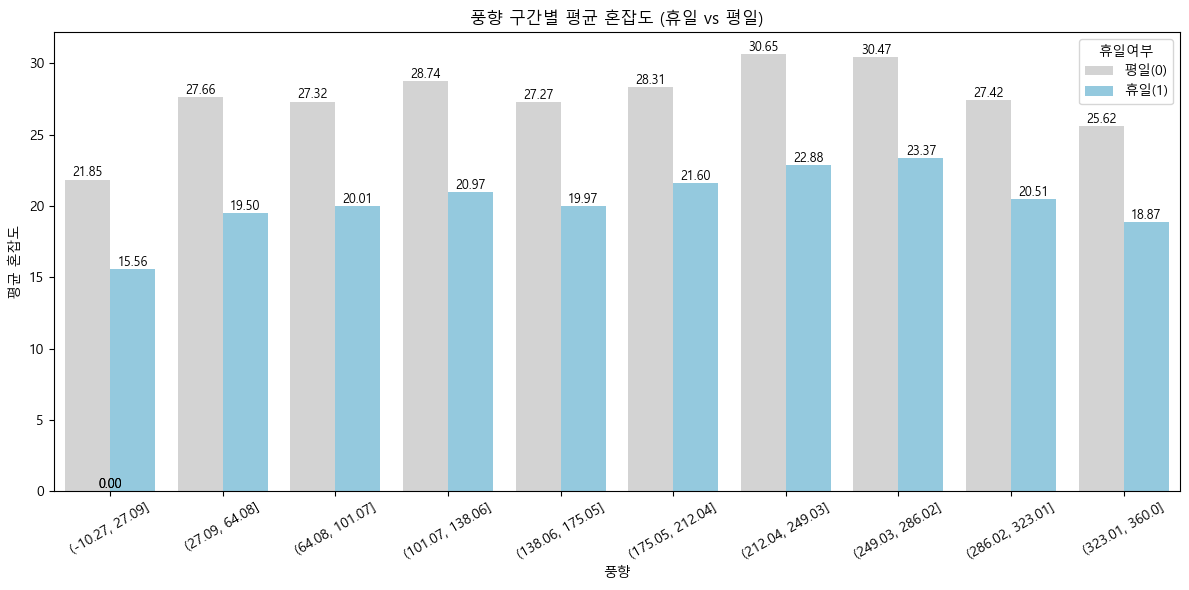

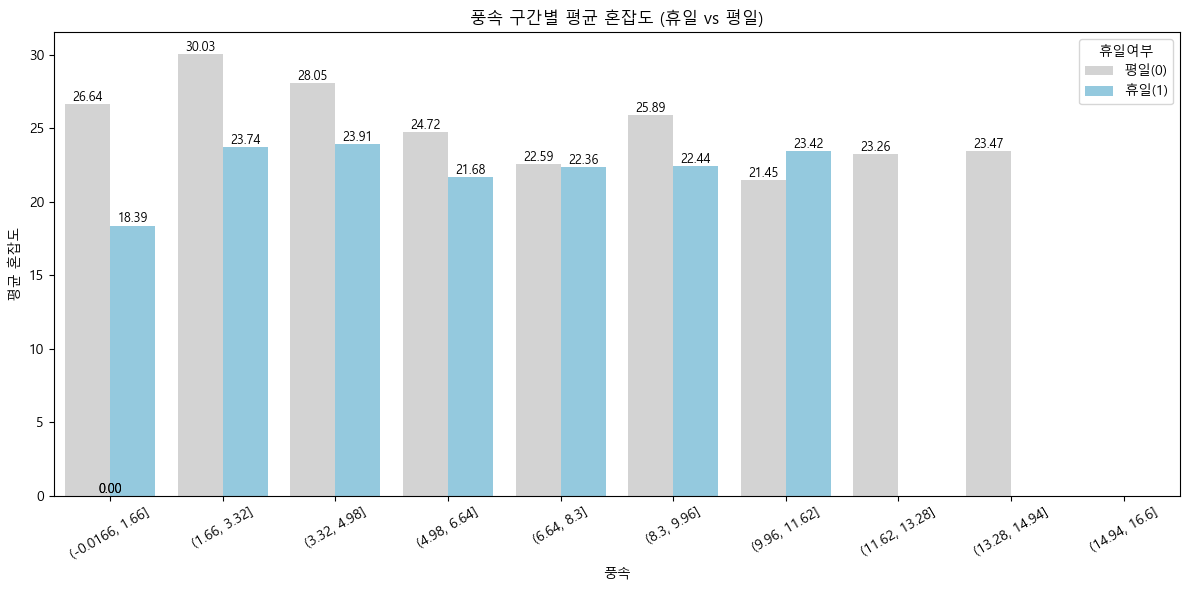

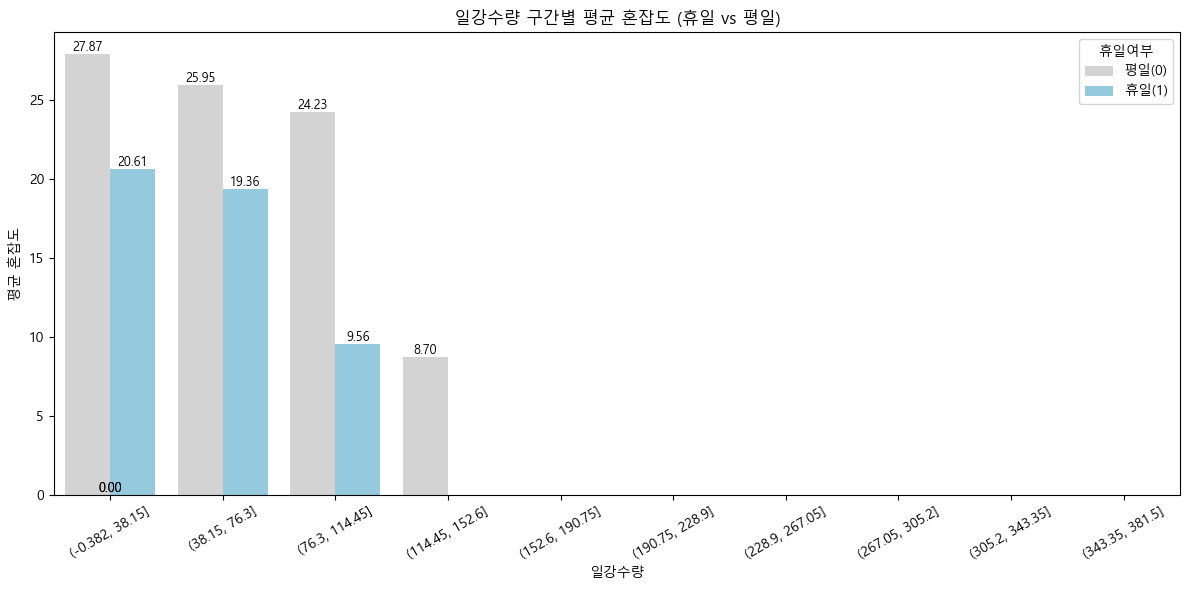

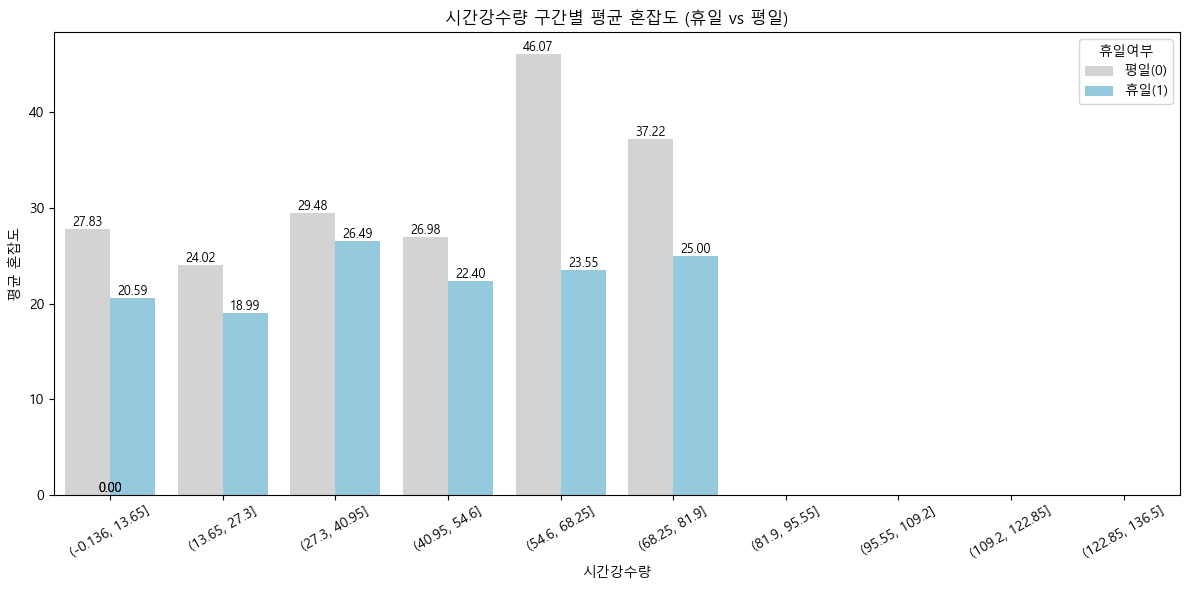

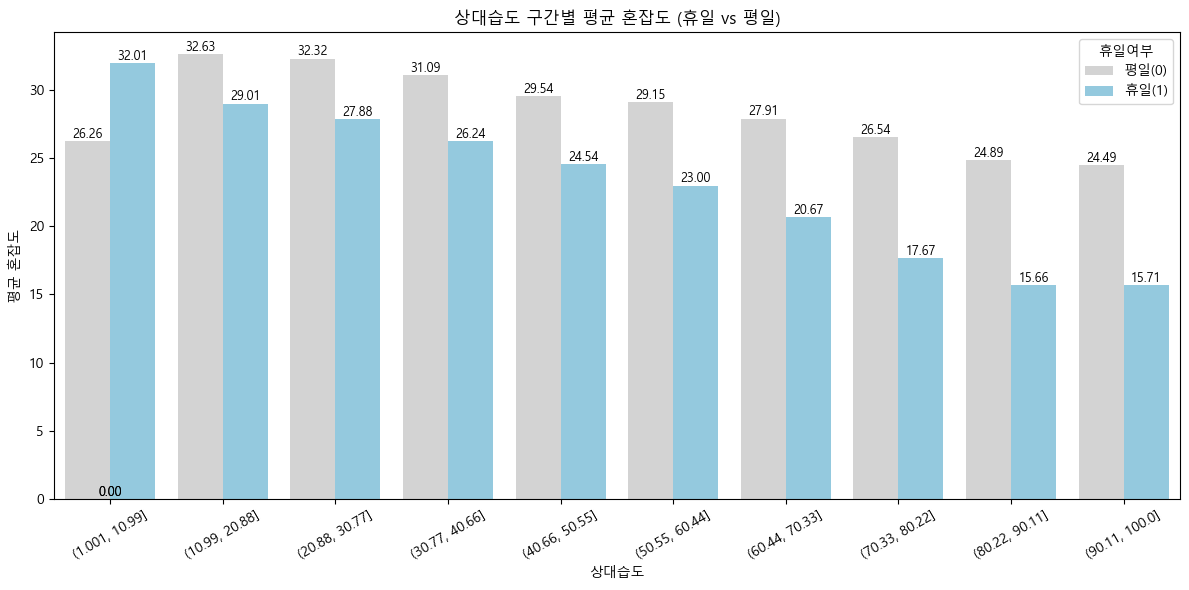

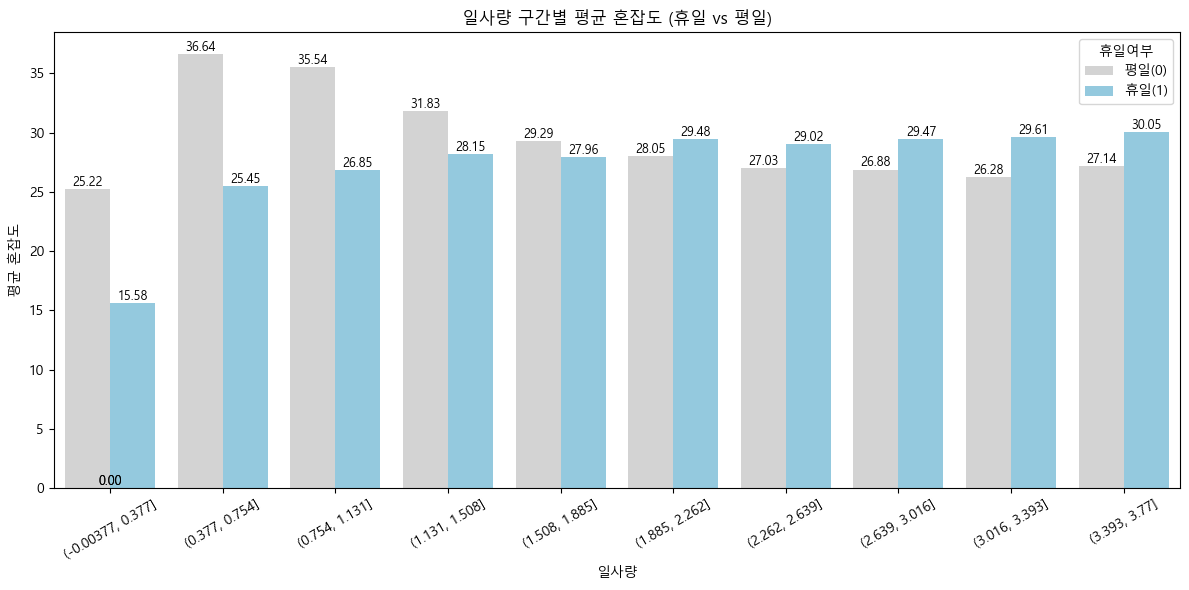

In [47]:
# 가설 : 휴일이 그렇지 않은 날보다 기상에 따른 영향(혼잡도) 적을 것이다. 
eda_df = df.loc[df['년']==2023,기상_cols+['휴일여부']]

for cut_col in ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량']:
    name = f'{cut_col}_구간'
    eda_df[name] = pd.cut(df[cut_col], bins=10)
    stats = (
        eda_df
        .groupby([name, '휴일여부'])['혼잡도']
        .mean()
        .reset_index()
    )
    
    # 그리기
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=stats,
        x=name,
        y='혼잡도',
        hue='휴일여부',
        ci=None,
        palette={0: 'lightgrey', 1: 'skyblue'},
        order=sorted(stats[name].unique()),         # x축 구간 순서 보장
        hue_order=[0, 1]                             # 0=평일, 1=휴일 순서로
    )
    
    # 막대 위에 평균값 표시
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(
                p.get_x() + p.get_width() / 2,  # x 위치: 막대 중앙
                height + 0.01,                  # y 위치: 막대 위 약간 띄우기
                f"{height:.2f}",                # 소수점 둘째 자리까지
                ha='center', va='bottom',
                fontsize=9
            )
    
    # 제목·레이블
    plt.title(f"{cut_col} 구간별 평균 혼잡도 (휴일 vs 평일)")
    plt.xlabel(cut_col)
    plt.ylabel("평균 혼잡도")
    plt.xticks(rotation=30)
    plt.legend(title='휴일여부', labels=['평일(0)', '휴일(1)'])
    plt.tight_layout()
    plt.show()

# EDA : 계절 <-> 지하철 혼잡도 
- 월
- 월 + 비오는날
- 월 + 습도
- 월 + 체감온도
- 월 + 시간
- 월 + 일사량

## 습도

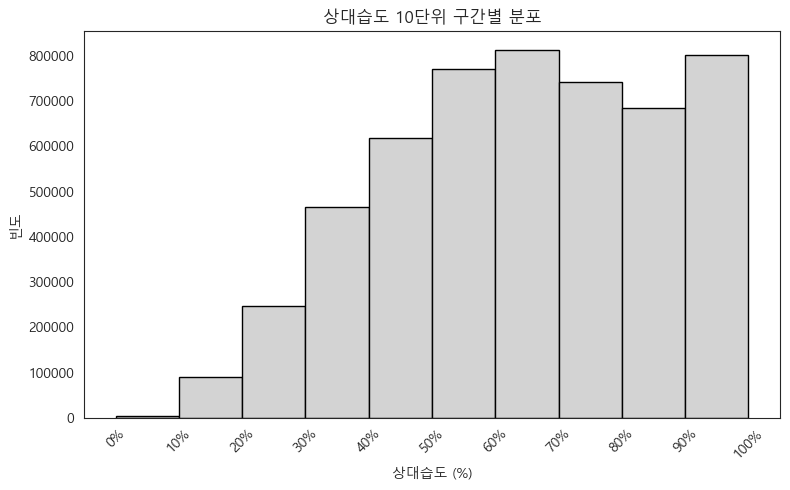

In [116]:
# 1) 0~100까지 10단위로 bin 경계 정의
bins = np.arange(0, 101, 10)      # [  0,  10,  20, …, 100]
labels = [f"{i}–{i+10}%" for i in bins[:-1]]  # ['0–10%', '10–20%', …, '90–100%']

# 2) 상대습도_구간 컬럼 생성
df['상대습도_구간'] = pd.cut(
    df['상대습도'],
    bins=bins,
    labels=labels,
    right=False,        # 오른쪽 경계 제외, 왼쪽 경계 포함
    include_lowest=True # 최솟값 포함
)

# 3) 히스토그램: 구간별 빈도 시각화
plt.figure(figsize=(8,5))
plt.hist(
    df['상대습도'],
    bins=bins,
    edgecolor='black',
    color='lightgray'
)
plt.xticks(bins, [f"{b}%" for b in bins], rotation=45)
plt.xlabel('상대습도 (%)')
plt.ylabel('빈도')
plt.title('상대습도 10단위 구간별 분포')
plt.tight_layout()
plt.show()


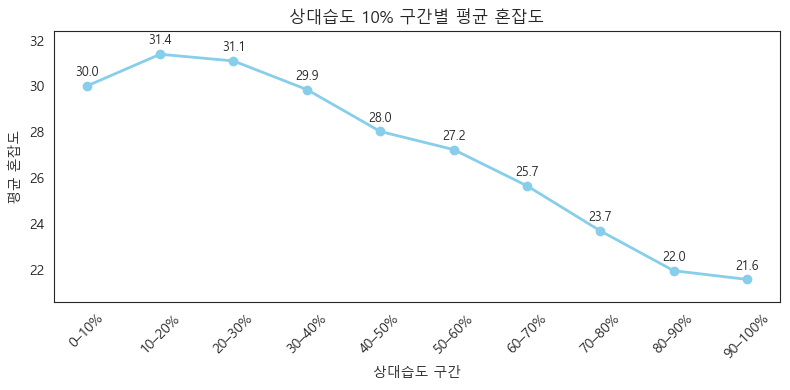

In [118]:
humidity_bins = [f"{i}–{i+10}%" for i in range(0, 100, 10)]

# 2) 구간별 평균 혼잡도 계산 (labels 순서대로 reindex)
humidity_mean = (
    df.groupby('상대습도_구간')['혼잡도']
      .mean()
      .reindex(humidity_bins)
)

# 4) 플롯
fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(humidity_bins))

ax.plot(
    x,
    humidity_mean.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color='skyblue'
)

# 5) 값 표시
for xi, yi in zip(x, humidity_mean.values):
    ax.text(xi, yi + 0.3, f"{yi:.1f}",
            ha='center', va='bottom', fontsize=9)

# 6) x축 설정
ax.set_xticks(x)
ax.set_xticklabels(humidity_bins, rotation=45)
ax.set_xlabel('상대습도 구간')
ax.set_ylabel('평균 혼잡도')
ax.set_ylim(humidity_mean.min() - 1, humidity_mean.max() + 1)
ax.set_title('상대습도 10% 구간별 평균 혼잡도')

# 7) 불필요한 격자/스파인 제거
ax.grid(False)

plt.tight_layout()
plt.show()

## 기온

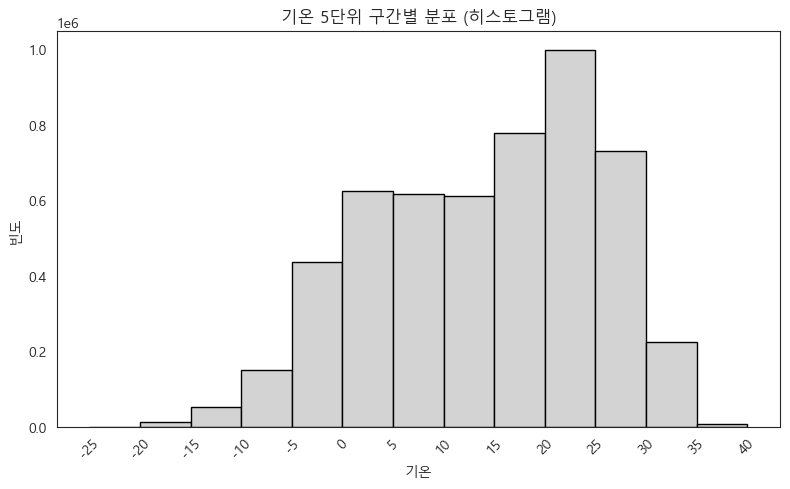

In [126]:
# 1) 기온 최소·최대값 기준으로 5단위 bin 경계 정의
min_temp = np.floor(df['기온'].min() / 5) * 5
max_temp = np.ceil(df['기온'].max() / 5) * 5
bins = np.arange(min_temp, max_temp + 5, 5)  
# 예: [–? , 0, 5, 10, 15, …]

# 2) 레이블 생성 (“시작–끝” 형태)
labels = [f"{int(b)}–{int(b+5)}" for b in bins[:-1]]

# 3) 기온_구간 컬럼 생성
df['기온_구간_5도'] = pd.cut(
    df['기온'],
    bins=bins,
    labels=labels,
    right=False,        # [시작, 끝)
    include_lowest=True # 최솟값 포함
)

# 4) 히스토그램: 5단위 구간 빈도 시각화
plt.figure(figsize=(8,5))
plt.hist(
    df['기온'],
    bins=bins,
    edgecolor='black',
    color='lightgray'
)
plt.xticks(bins, [f"{int(b)}" for b in bins], rotation=45)
plt.xlabel('기온')
plt.ylabel('빈도')
plt.title('기온 5단위 구간별 분포 (히스토그램)')
plt.tight_layout()
plt.show()

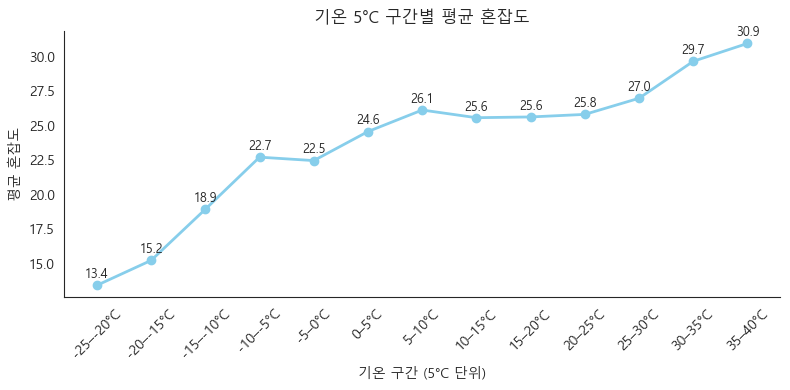

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 기온 최소·최대값 기준으로 5도 단위 bin 경계 정의
min_temp = np.floor(df['기온'].min() / 5) * 5
max_temp = np.ceil(df['기온'].max() / 5) * 5
bins = np.arange(min_temp, max_temp + 5, 5)  # 예: [-10, -5, 0, 5, 10, …]

# 2) 레이블 생성 (“시작–끝°C” 형태)
labels = [f"{int(b)}–{int(b+5)}°C" for b in bins[:-1]]

# 3) 기온_구간_5도 컬럼 생성
df['기온_구간_5도'] = pd.cut(
    df['기온'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# 4) 구간별 평균 혼잡도 계산 및 순서 보장
temp_mean = (
    df.groupby('기온_구간_5도')['혼잡도']
      .mean()
      .reindex(labels)
)

# 5) x 좌표 생성
x = np.arange(len(labels))

# 6) 플롯 그리기
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(
    x,
    temp_mean.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color='skyblue'
)

# 7) 점 위에 값 표시
for xi, yi in zip(x, temp_mean.values):
    ax.text(
        xi, yi + 0.3, f"{yi:.1f}",
        ha='center', va='bottom', fontsize=9
    )

# 8) x축 레이블 설정
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('기온 구간 (5°C 단위)')
ax.set_ylabel('평균 혼잡도')
ax.set_title('기온 5°C 구간별 평균 혼잡도')

# 9) 격자선·스파인 제거
ax.grid(False)
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

## 월

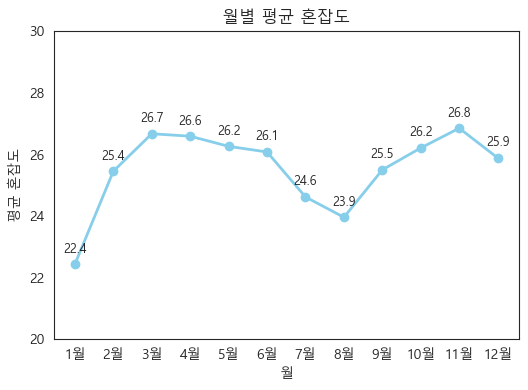

In [108]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# 2) 월별 평균 혼잡도 계산
monthly_mean = df.groupby('월')['혼잡도'].mean().reindex(range(1,13))

# 3) 플롯
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    monthly_mean.index,
    monthly_mean.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color='skyblue'
)

# 4) 점 위에 값 표시
for x, y in zip(monthly_mean.index, monthly_mean.values):
    ax.text(x, y + 0.3, f"{y:.1f}",
            ha='center', va='bottom', fontsize=9)

# 5) x축 레이블
ax.set_ylim(20, 30)
ax.set_xticks(range(1,13))
ax.set_xticklabels([f"{m}월" for m in range(1,13)])
ax.set_xlabel('월')
ax.set_ylabel('평균 혼잡도')
ax.set_title('월별 평균 혼잡도')
plt.show()

## 일강수량

In [45]:
df = eda_df.copy()

df['일강수량_구간'] = np.where(df['일강수량'] >= 20, '강한비',
                       np.where(df['일강수량'] >= 10, '보통비',
                       np.where(df['일강수량'] >= 1, '약한비', '비 안 옴')))
conditions = [
    df['월'].between(3, 5),   # 3,4,5월 → 봄
    df['월'].between(6, 8),   # 6,7,8월 → 여름
    df['월'].between(9, 11),  # 9,10,11월 → 가을
]
choices = ['봄', '여름', '가을']
df['계절'] = np.select(conditions, choices, default='겨울')

df['월'] = df['월'].astype('category')

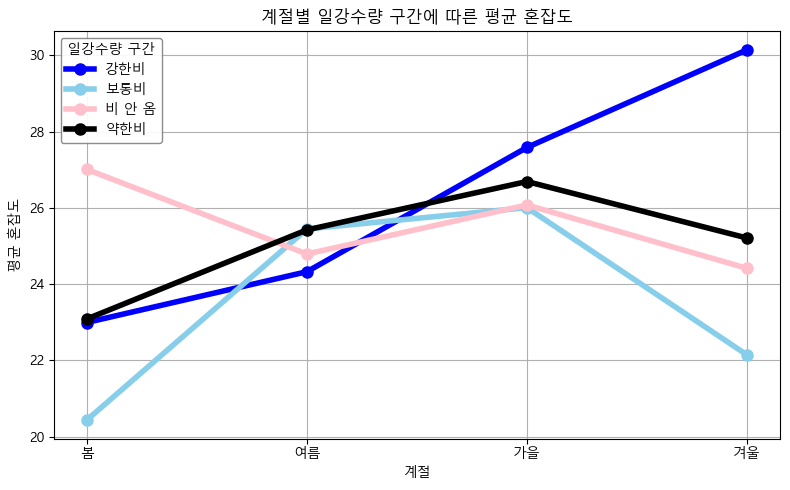

In [37]:
# 3) 계절 순서형 지정
season_order = ['봄', '여름', '가을', '겨울']
df['계절'] = pd.Categorical(df['계절'],
                           categories=season_order,
                           ordered=True)

# 4) 피벗 테이블 생성
tab = pd.crosstab(
    index=df['계절'],
    columns=df['일강수량_구간'],
    values=df['혼잡도'],
    aggfunc='mean'
).reindex(index=season_order)

# 5) 컬러 맵 정의 (키는 반드시 위에서 만든 4가지 문자열과 일치)
colors = {
    '비 안 옴': 'pink',
    '약한비':   'black',
    '보통비':   'skyblue',
    '강한비':   'blue',
}

# 6) 라인 플롯
fig, ax = plt.subplots(figsize=(8, 5))
for category in tab.columns:
    ax.plot(
        tab.index, tab[category],
        marker='o',
        label=category,
        color=colors.get(category, 'gray')  # 맵에 없으면 'gray' 사용
        ,markersize=8
        ,linewidth=4
    )

ax.set_xlabel('계절')
ax.set_ylabel('평균 혼잡도')
ax.set_title('계절별 일강수량 구간에 따른 평균 혼잡도')
ax.grid(True)

# 7) 범례 스타일링
ax.legend(
    title='일강수량 구간',
    loc='best',
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)

plt.tight_layout()
plt.show()

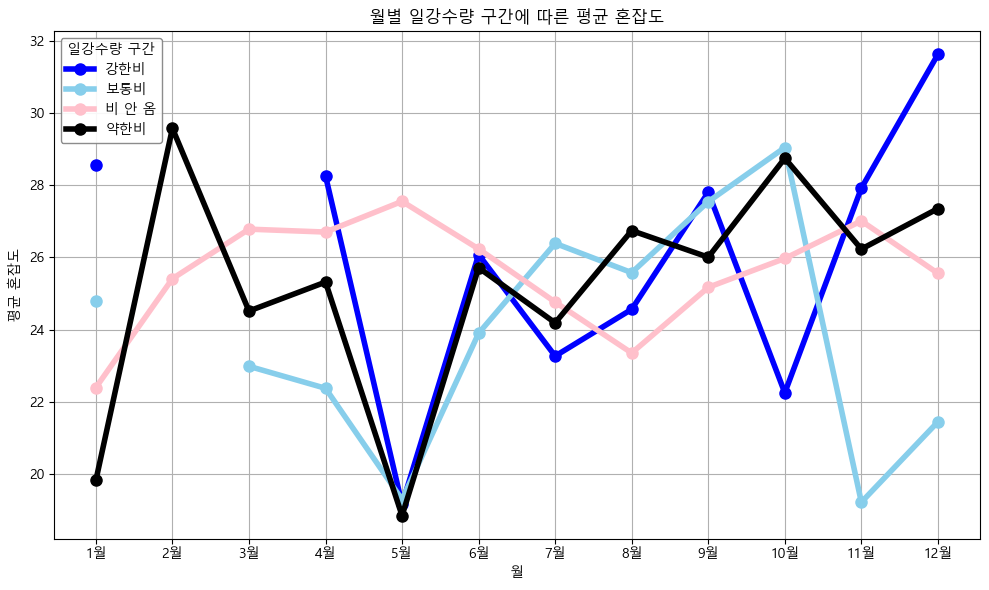

In [48]:
# 2) 월을 순서형 범주형으로 지정 (1~12월)
month_order = list(range(1, 13))
df['월'] = pd.Categorical(df['월'],
                         categories=month_order,
                         ordered=True)

# 3) 피벗 테이블 생성
tab = pd.crosstab(
    index=df['월'],
    columns=df['일강수량_구간'],
    values=df['혼잡도'],
    aggfunc='mean'
).reindex(index=month_order)

# 4) 컬러맵 정의
colors = {
    '비 안 옴': 'pink',
    '약한비':   'black',
    '보통비':   'skyblue',
    '강한비':   'blue',
}

# 5) 라인 플롯
fig, ax = plt.subplots(figsize=(10, 6))
for category in tab.columns:
    ax.plot(
        [int(m) for m in tab.index],   # 카테고리형 월 → 정수 리스트
        tab[category],
        marker='o',
        markersize=8,
        linewidth=4,
        label=category,
        color=colors.get(category, 'gray')
    )

# 6) x축 눈금·레이블 설정
ax.set_xticks(month_order)
ax.set_xticklabels([f'{m}월' for m in month_order])

ax.set_xlabel('월')
ax.set_ylabel('평균 혼잡도')
ax.set_title('월별 일강수량 구간에 따른 평균 혼잡도')
ax.grid(True)

# 7) 범례
ax.legend(
    title='일강수량 구간',
    loc='best',
    frameon=True,
    framealpha=0.9,
    edgecolor='gray'
)

plt.tight_layout()
plt.show()

## 일사량

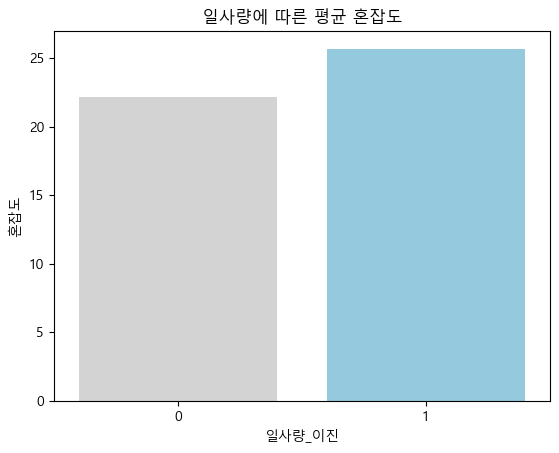

In [54]:
df['일사량_이진'] = np.where(df['일사량']==0, '0', '1')
import seaborn as sns
plt.title('일사량에 따른 평균 혼잡도')
sns.barplot(df.groupby('일사량_이진')['혼잡도'].mean(), palette=['lightgrey','skyblue'])
plt.show()

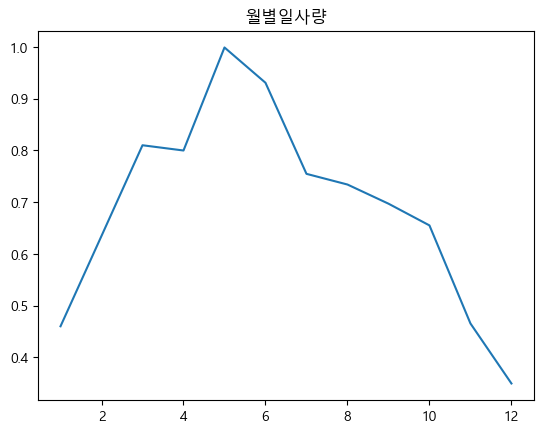

In [59]:
plt.plot(df.groupby('월')['일사량'].mean())
plt.title('월별일사량')
plt.show()

## 시간

In [68]:
# (1) 야간 시간 정의: 19~23시 + 0~5시
night_hours = list(range(19, 24)) + list(range(0, 6))

# (2) df에 is_night 컬럼 추가
df['is_night'] = df['시간'].isin(night_hours)

# (3) 일사량_이진==0인 경우의 is_night 비율 확인
zero_radiation = df[df['일사량_이진'] == '0']
night_ratio = zero_radiation['is_night'].mean()
day_times = zero_radiation.loc[~zero_radiation['is_night'], '시간'].unique()

print(f"일사량=0 중 야간 비율: {night_ratio:.2%}")
print(f"야간이 아닌 시간대(일사량=0): {sorted(day_times)}시")

일사량=0 중 야간 비율: 56.89%
야간이 아닌 시간대(일사량=0): [6, 7, 8, 9, 10, 17, 18]시


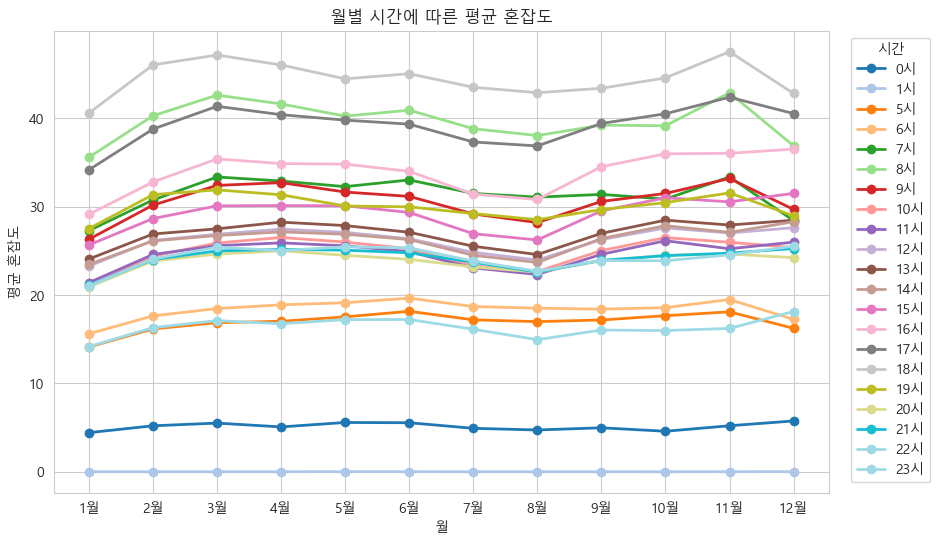

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2) 월을 순서형 범주형으로 지정 (1~12월)
month_order = list(range(1, 13))
df['월'] = pd.Categorical(df['월'],
                         categories=month_order,
                         ordered=True)

# 3) 피벗 테이블 생성
tab = pd.crosstab(
    index=df['월'],
    columns=df['시간'],
    values=df['혼잡도'],
    aggfunc='mean'
).reindex(index=month_order)

# 5) 라인 플롯
fig, ax = plt.subplots(figsize=(10, 6))

# ———— 컬러맵 준비 ————
n_lines = len(tab.columns)
cmap = plt.get_cmap('tab20', n_lines)  # 'tab20'에서 n_lines 색을 뽑아냄

for i, category in enumerate(tab.columns):
    ax.plot(
        [int(m) for m in tab.index],   # 카테고리형 월 → 정수 리스트
        tab[category],
        marker='o',
        markersize=6,
        linewidth=2,
        label=f"{category}시",
        color=cmap(i)                  # i번째 색 사용
    )

# 6) x축 눈금·레이블 설정
ax.set_xticks(month_order)
ax.set_xticklabels([f'{m}월' for m in month_order])
ax.legend(title='시간', bbox_to_anchor=(1.02, 1), loc='upper left')

ax.set_xlabel('월')
ax.set_ylabel('평균 혼잡도')
ax.set_title('월별 시간에 따른 평균 혼잡도')
ax.grid(True)

In [81]:
tab

시간,0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
월,,,,,,,,,,,,,,,,,,,,,
1,4.430,0.009,14.119,15.615,27.284,35.588,26.310,20.987,21.405,23.269,24.072,23.466,25.663,29.130,34.168,40.588,27.518,20.925,21.076,21.013,14.170
2,5.204,0.010,16.167,17.640,30.753,40.280,30.169,24.394,24.585,26.171,26.899,26.114,28.647,32.788,38.773,46.031,31.352,23.849,24.015,24.070,16.306
3,5.509,0.010,16.871,18.466,33.351,42.609,32.397,25.883,25.579,26.876,27.488,26.725,30.083,35.394,41.345,47.144,31.894,24.623,24.986,25.417,17.099
4,5.076,0.011,17.026,18.884,32.890,41.613,32.709,26.504,25.897,27.452,28.240,27.139,30.116,34.866,40.395,46.018,31.334,25.003,25.153,25.012,16.749
5,5.581,0.014,17.528,19.127,32.258,40.231,31.644,25.988,25.564,27.086,27.850,26.869,30.091,34.804,39.781,44.453,30.069,24.488,25.068,25.449,17.219
6,5.550,0.012,18.153,19.643,33.015,40.907,31.153,25.231,24.901,26.367,27.095,26.271,29.336,33.986,39.324,45.032,29.969,24.034,24.776,25.336,17.226
7,4.917,0.009,17.190,18.695,31.487,38.812,29.171,23.286,23.067,24.817,25.513,24.488,26.935,31.415,37.309,43.498,29.209,23.177,23.699,23.838,16.129
8,4.731,0.009,16.987,18.507,31.068,38.038,28.192,22.654,22.318,23.956,24.574,23.680,26.223,30.804,36.861,42.880,28.521,22.587,22.591,22.679,14.943
9,4.978,0.010,17.173,18.398,31.378,39.211,30.584,25.020,24.599,26.259,26.972,26.387,29.510,34.514,39.407,43.384,29.666,23.859,23.919,23.898,16.040


In [82]:
conditions = [
    df['시간'].between(0, 1),    # 0–1시 → 심야
    df['시간'].between(7, 9),    # 7–9시 → 출근시간
    df['시간'].between(10, 16),  # 10–16시 → 낮 시간
    df['시간'].between(17, 19),  # 17–19시 → 퇴근시간
    df['시간'].between(20, 23),  # 20–23시 → 저녁 한산
]

# 각 조건에 매칭될 카테고리 이름
choices = ['심야', '출근시간', '낮 시간', '퇴근시간', '저녁 한산']

# 시간대 컬럼 생성 (위에 정의하지 않은 2–6시는 '기타'로 처리)
df['시간_구간'] = np.select(conditions, choices, default='기타')

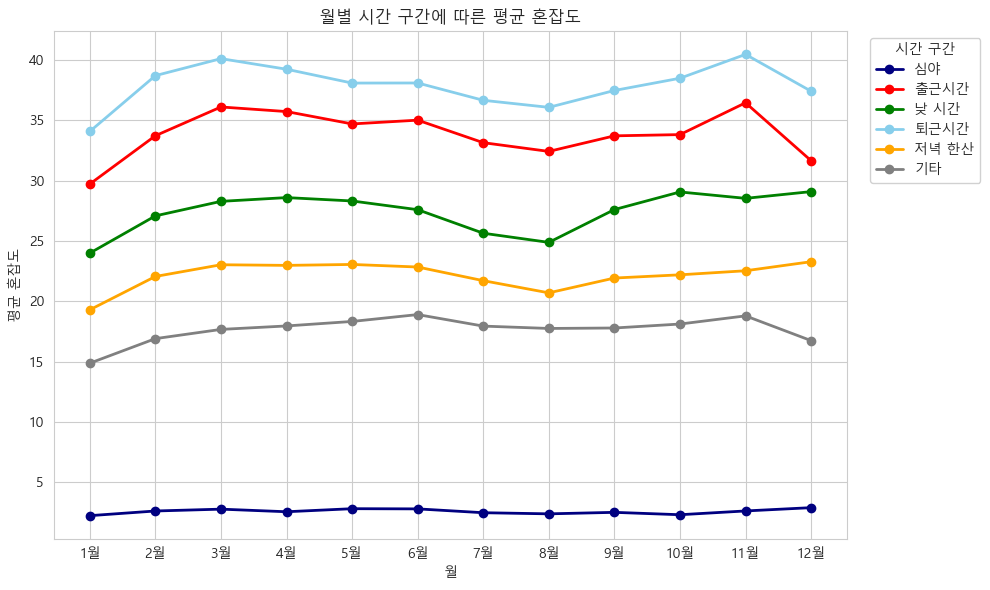

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) 시간대 구간화 (예시)
conditions = [
    df['시간'].between(0, 1),    # 0–1시 → 심야
    df['시간'].between(7, 9),    # 7–9시 → 출근시간
    df['시간'].between(10, 16),  # 10–16시 → 낮 시간
    df['시간'].between(17, 19),  # 17–19시 → 퇴근시간
    df['시간'].between(20, 23),  # 20–23시 → 저녁 한산
]
choices = ['심야', '출근시간', '낮 시간', '퇴근시간', '저녁 한산']
df['시간_구간'] = np.select(conditions, choices, default='기타')

# 2) 월을 순서형 범주로 지정
month_order = list(range(1, 13))
df['월'] = pd.Categorical(df['월'], categories=month_order, ordered=True)

# 3) 피벗 테이블 생성
tab = pd.crosstab(
    index=df['월'],
    columns=df['시간_구간'],
    values=df['혼잡도'],
    aggfunc='mean'
).reindex(index=month_order)

# 4) 컬러 맵 & 순서 정의
time_order = ['심야','출근시간','낮 시간','퇴근시간','저녁 한산','기타']
tab = tab.reindex(columns=time_order)  # 컬럼 순서 고정

colors = {
    '심야':     'navy',  # 파랑톤
    '출근시간': 'red',  # 빨강톤
    '낮 시간':  'green',  # 초록톤
    '퇴근시간': 'skyblue',  # 보라톤
    '저녁 한산':'orange',  # 주황톤
    '기타':     'grey'   # 청록톤
}

# 5) 라인 플롯
fig, ax = plt.subplots(figsize=(10, 6))
for seg in time_order:
    ax.plot(
        month_order,
        tab[seg],
        marker='o',
        markersize=6,
        linewidth=2,
        label=seg,
        color=colors[seg]
    )

# 6) x축 설정
ax.set_xticks(month_order)
ax.set_xticklabels([f'{m}월' for m in month_order])
ax.set_xlabel('월')
ax.set_ylabel('평균 혼잡도')
ax.set_title('월별 시간 구간에 따른 평균 혼잡도')
ax.grid(True)

# 7) 범례
ax.legend(
    title='시간 구간',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()


# EDA : 자연재해 <-> 지하철 혼잡도 

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  
pd.options.display.float_format = '{:.3f}'.format

혼잡도 = pd.read_csv('./data/data2.csv', usecols=['날짜','연월일','년','월','혼잡도'])
태풍 = pd.read_csv('./data/자연재해/태풍.csv')
폭염 = pd.read_csv('./data/자연재해/폭염.csv')
황사 = pd.read_csv('./data/자연재해/황사.csv')
한파 = pd.read_excel('./data/자연재해/한파.xlsx')

폭염.columns = ['날짜','폭염특보']
황사= 황사['일자	황사관측'.split()]
황사.columns = ['날짜','황사관측']
한파 = 한파[['일시','한파특보(O/X)']]
한파.columns = ['날짜','한파특보']

혼잡도['연월일'] = pd.to_datetime(혼잡도['연월일'])
태풍['날짜'] = pd.to_datetime(태풍['날짜'])
한파['날짜'] = pd.to_datetime(한파['날짜'])
황사['날짜'] = pd.to_datetime(황사['날짜'])

# 2) left_on / right_on 제대로 사용해서 병합
merged = 혼잡도.merge(
    태풍,
    how='left',
    left_on='연월일',
    right_on='날짜')

황사['황사관측'] = np.where(황사['황사관측']=='O', 1, 0)
한파['한파특보'] = np.where(한파['한파특보']=='X', 0, 1)

merged= 한파.merge(
    황사,
    how='left',
    on='날짜').merge(
    태풍,
    how='left',
    on='날짜')
merged= merged.fillna(0)
df = 혼잡도[['연월일','혼잡도']].drop_duplicates().reset_index(drop=True)
df = df.groupby('연월일')['혼잡도'].mean()
df.shape
merged2 = merged.merge(
    df,
    how='left',
    left_on='날짜',
    right_on='연월일')
merged2 = merged2.drop_duplicates()
merged2 = merged2.dropna()

In [12]:
# 휴일여부 컬럼 생성
from holidayskr import year_holidays
merged2['날짜'] = pd.to_datetime(merged2['날짜'])
merged2['요일'] = merged2['날짜'].dt.dayofweek

dates_only1 = [d[0] for d in year_holidays('2021')]
dates_only2 = [d[0] for d in year_holidays('2022')]
dates_only3 = [d[0] for d in year_holidays('2023')]

cond1 = merged2['요일'].isin([5,6])
cond2 = merged2['날짜'].isin(dates_only1)
cond3 = merged2['날짜'].isin(dates_only2)
cond4 = merged2['날짜'].isin(dates_only3)

cond_total = cond1 | cond2 | cond3 | cond4
merged2['휴일여부'] = cond_total.astype(int)

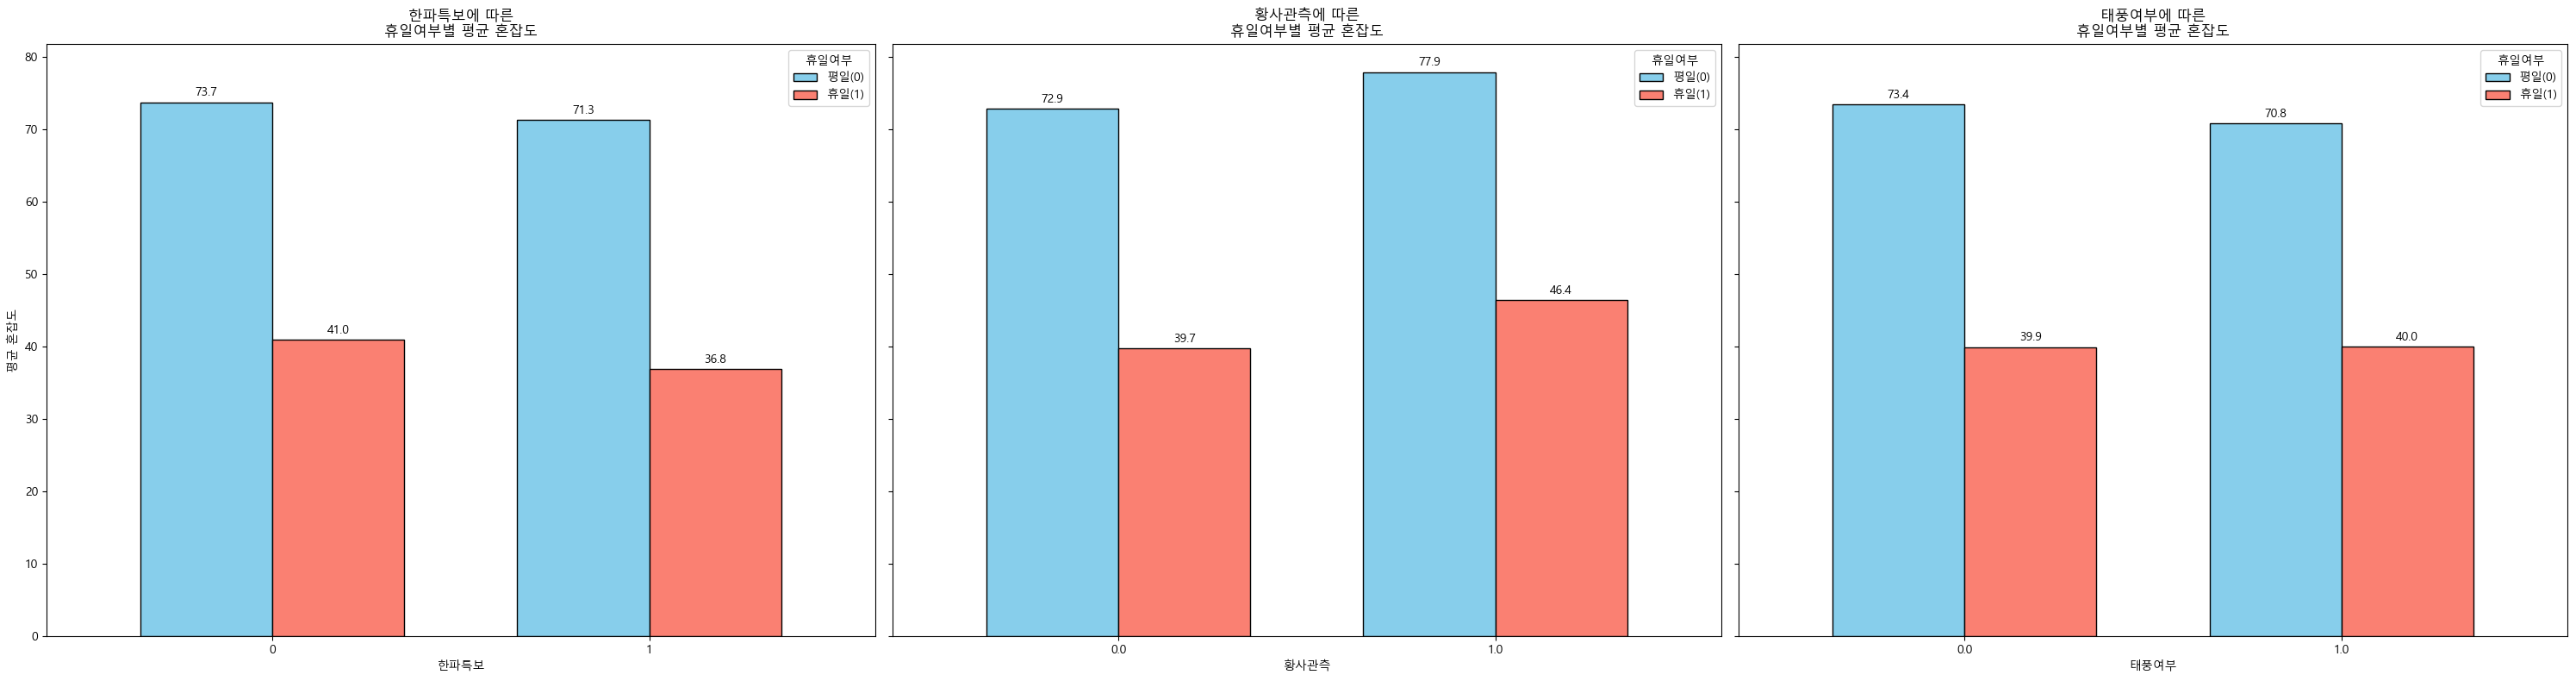

In [16]:
# 1) 비교할 기상 변수 리스트
weather_cols = ['한파특보', '황사관측', '태풍여부']

# 2) 전체 subplot 설정
fig, axes = plt.subplots(1, len(weather_cols), figsize=(10 * len(weather_cols), 8), sharey=True)

for ax, col in zip(axes, weather_cols):
    # 3) 휴일여부별 평균 혼잡도 계산
    pivot = (
        merged2
        .groupby([col, '휴일여부'])['혼잡도']
        .mean()
        .unstack(fill_value=0)  # 휴일여부가 0,1 두 컬럼으로 펼치기
    )
    # 4) 막대그래프 그리기
    bars = pivot.plot.bar(
        ax=ax,
        rot=0,
        width=0.7,
        color=['skyblue','salmon'],
        edgecolor='black'
    ).containers
    
    # 5) 값 라벨 표시
    for bar_container in bars:
        ax.bar_label(bar_container, fmt='%.1f', padding=3)
    
    ax.set_title(f"{col}에 따른\n휴일여부별 평균 혼잡도")
    ax.set_xlabel(col)
    ax.set_ylabel('평균 혼잡도')
    ax.legend(title='휴일여부', labels=['평일(0)', '휴일(1)'])

plt.tight_layout()
plt.show()


# EDA : 이외요소 <-> 지하철 혼잡도 
- 컬럼 : 요일, 휴일여부, 시간, 승차총승객수, 하차총승객수, 호선, 역명, 상하구분,

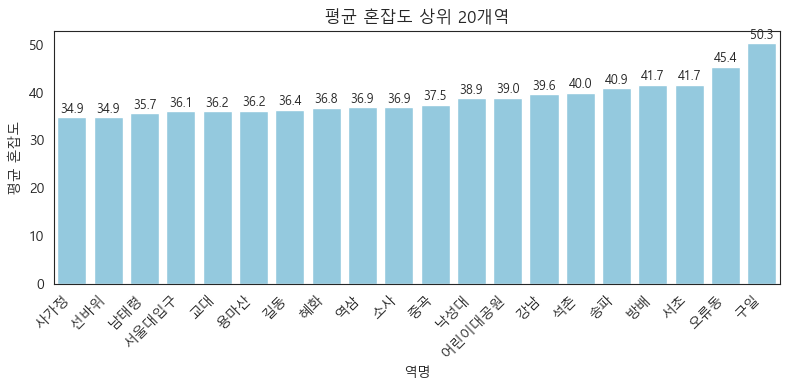

In [188]:
# 예시: col 에 따라 반복하실 때
for col in ['역명']:
    # 1) 그룹별 평균 계산 & 정렬 & 상위 20개 선택
    data = (
        df.groupby(col)['혼잡도']
          .mean()
          .sort_values()
          .reset_index()
          .tail(20)
    )

    # 2) 플롯 생성
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(
        x=col,
        y='혼잡도',
        data=data,
        color='skyblue'
    )
    ax.set_title(f"평균 혼잡도 상위 20개역")
    ax.set_xlabel(col)
    ax.set_ylabel('평균 혼잡도')
    
    # x축 레이블 45도 회전
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # 3) 막대 위에 값 표시
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,  # 막대 중앙
            y=height + 0.3,                   # 막대 위쪽
            s=f"{height:.1f}",                # 소수점 1자리
            ha='center', va='bottom',
            fontsize=9
        )
    
    plt.tight_layout()
    plt.show()

In [192]:
상위20개역리스트 =data['역명']
tab = df[df['역명'].isin(상위20개역리스트)]
pd.crosstab(tab['역명'], tab['호선'])

호선,1,2,3,4,5,7,8
역명,,,,,,,
강남,0,45360,0,0,0,0,0
교대,0,45360,45360,0,0,0,0
구일,45360,0,0,0,0,0,0
길동,0,0,0,0,45360,0,0
낙성대,0,45360,0,0,0,0,0
남태령,0,0,0,45360,0,0,0
방배,0,45360,0,0,0,0,0
사가정,0,0,0,0,0,45360,0
서울대입구,0,45360,0,0,0,0,0


In [184]:
import numpy as np

for line in sorted(df['호선'].unique()):
    # 1) 해당 호선의 역명 unique 배열 뽑기
    stations = df.loc[df['호선'] == line, '역명'].unique()
    # 2) numpy로 정렬
    stations_sorted = np.sort(stations)
    
    # 출력
    print(f"{line}호선 ({len(stations_sorted)}개):")
    for st in stations_sorted:
        print("  ", st)
    print()

1호선 (64개):
   가능
   간석
   개봉
   광운대
   구로
   구일
   남영
   노량진
   녹양
   녹천
   대방
   덕계
   덕정
   도봉
   도봉산
   도원
   도화
   동대문
   동두천
   동두천중앙
   동묘앞
   동암
   동인천
   망월사
   방학
   백운
   보산
   부개
   부천
   부평
   서울역
   석계
   소사
   소요산
   송내
   시청
   신길
   신도림
   신설동
   신이문
   양주
   역곡
   연천
   영등포
   오류동
   온수
   외대앞
   용산
   월계
   의정부
   인천
   전곡
   제기동
   제물포
   종각
   종로3가
   종로5가
   주안
   중동
   지행
   창동
   청량리
   회기
   회룡

2호선 (42개):
   강남
   강변
   건대입구
   교대
   구로디지털단지
   구의
   낙성대
   당산
   대림
   동대문역사문화공원
   뚝섬
   문래
   방배
   봉천
   사당
   삼성
   상왕십리
   서울대입구
   서초
   선릉
   성수
   시청
   신당
   신대방
   신도림
   신림
   아현
   역삼
   영등포구청
   왕십리
   을지로3가
   을지로4가
   을지로입구
   이대
   잠실
   잠실나루
   잠실새내
   종합운동장
   충정로
   한양대
   합정
   홍대입구

3호선 (44개):
   가락시장
   경복궁
   경찰병원
   고속터미널
   교대
   구파발
   금호
   남부터미널
   녹번
   대곡
   대청
   대치
   대화
   도곡
   독립문
   동대입구
   마두
   매봉
   무악재
   백석
   불광
   삼송
   수서
   신사
   안국
   압구정
   약수
   양재
   연신내
   오금
   옥수
   원당
   원흥
   을지로3가
   일원
   잠원
   정발산
   종로3가
   주